# Project Report: Analysis of YouTube Trending Video Data
##### Group 1 Terp Analytica: Akshay Havalgi, Austin Hom, Bekzod Akramov, Shashank Manu Rao, Vivek Ramanathan

In this notebook, we will provide a detailed report on our analysis of YouTube Trending Video data, including codes we have used in cleaning, preparing, and visualizing the data.

## 1) Introduction

In the modern age, most people have access to a variety of electronic devices. This means more and more people are consuming content using online video services, among which YouTube is the most popular. According to Google, the owner of YouTube, over 400 hours of video are uploaded every minute, 100s of millions of hours are watched each day, and billions of users visit YouTube each month. Thus, YouTube provides something of interest for creators, viewers, and advertisers. YouTube videos are monetized through ad revenues, so the more views a video receives, the more ad revenue that can be generated. From the advertiser's point of view, they want to market their product to as wide an audience as possible, so they will want their ads on the most popular videos. 

In our project, we obtained the individual country datasets on videos that were trending on YouTube over the same time period. The data includes several months of data from 2017 to 2018 on daily trending YouTube videos, with up to 200 listed trending videos per day. There is a separate dataset for each country. Data includes the following variables/columns: category, video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count. The category variable varies between regions, and we will find categories for a specific video in its associated JSON. One such file is included for each region in the dataset. There is a column metadata for this dataset which provides more specific information about its contents.

Given YouTube’s large library of videos, it is important to filter videos to different users. YouTube uses a combination of different factors including measuring users interactions (number of views, shares, comments and likes) to determine if a video is trending. These trending videos are then made visible to users so they can see which videos are popular at a given moment. We looked at what factors make a video become trending and whether these factors are different across various countries and categories. We also explored why certain videos may generate more views, likes and comments.Given the current shift away from traditional TV to online platforms like YouTube, there is increased interest in the content of the videos on the online platforms, especially about which kinds of videos generate more engagement in the form of views, likes and comments, which in turn translate into more ads and revenues. Moreover, currently, COVID-19 has caused large numbers of people to stay at home, which will undoubtedly cause a spike in the number of daily YouTube visitors and create opportunities for video creators and advertisers.

The main research questions we tried to answer in our project include:
- What similarities and differences are there between trending videos in different regions (between the United States, Great Britain and India)?
- Which categories of trending videos have high likeability?
- What insights can we gain from text mining and natural language processing analyses on video titles, tags and descriptions? 
- Can we make any inferences about viewer preferences based on the analysis of the video data?
- What are the implications for content creation, monetization and advertising?

## 2) Choice for Heavier Grading on Data Processing or Data Analysis 

Although we did a good amount of data processing, we choose to be graded more heavily on data analysis. We believe our work goes above and beyond basic data analysis needed to answer several research questions. We started with some descriptive statistics about the videos in our dataset, then advanced to more complex analyses, including data visualizations, text mining, and natural language processing.

## 3) Data Processing

For our project, we chose to focus our analyses on the videos that were trending in the United States, Great Britain and India. This way we had a country representing three separate continents (North America, Europe and Asia), and each of these countries has large English-speaking populations, making it easier to work with the data. We completed the following tasks to process and prepare the data for visualization and analyses:

- Choosing valid data for analysis - videos currently trending on YouTube. Multiple datasets pertaining to different regions are imported from Kaggle.
- Importing and Merging data - Datasets of various regions are imported into python and joins are created to merge and form a master dataset.
- Data Cleaning - Check for missing values and duplicate data in our master dataset
- Data Transformation - Impute missing values, rename columns, change data types
- Feature Extraction - adding relevant columns for analysis such as like/dislike ratio, difference in publish time vs trending time, and year video published/trending
- Indexing, selection, and filtering - subsetting required data for analysis such as only videos in the music category



### i) Load Libraries
The first step in the data processing is to simply load in all of the libraries required.

In [1]:
#load all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt 
from pandas.io.json import json_normalize

### ii) Load Data
The next step is to load the data into the notebook and briefly inspect it. This includes both the CSV files and the JSON files. 

In [2]:
#%cd path

In [3]:
youtubeUS = pd.read_csv("USvideos.csv") #load US data using raw string

In [4]:
youtubeUS.shape #check dataframe dimensions

(40949, 16)

In [5]:
youtubeGB = pd.read_csv("GBvideos.csv") #load Great Britain youtube data 

In [6]:
youtubeGB.shape #check dataframe dimensions

(38916, 16)

In [7]:
youtubeIN = pd.read_csv("INvideos.csv") #load India youtube data 

In [8]:
youtubeIN.shape #check dataframe dimensions

(37352, 16)

In [9]:
youtubeUS.head(3) #check dataframe column values to get a feel of data

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...     Rudy Mancuso   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...

In [10]:
us_json = pd.read_json("US_category_id.json")

In [11]:
in_json = pd.read_json("IN_category_id.json")

In [12]:
gb_json = pd.read_json("GB_category_id.json")

In [13]:
us_json.head(3) #loading json files

kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...

In [14]:
us_json.dtypes

kind     object
etag     object
items    object
dtype: object

### iii) Merging the Datasets
The next step is to merge the datasets for the three countries. To do this, we will first create a tag for each country and then merge the dataframes so each entry can still be identified by country.

In [15]:
youtubeUS.insert(0,"Country","US", True)
youtubeGB.insert(0,"Country","GB", True) #insert country column with country code
youtubeIN.insert(0,"Country","IN", True)

In [16]:
youtubeUSGBIN = pd.concat([youtubeUS, youtubeGB, youtubeIN]) #concat all three dataframes

In [17]:
youtubeUSGBIN.shape #shape of master dataframe

(117217, 17)

### iv) Verify Data Integrity
To verify the integrity of our data, we will check if there are any null entries in our data and if the datatypes match what we want. As can be seen below, the only row we have to with nulls is description meaning our data is relatively clean. This makes sense however since some videos simply do not have descriptions. In terms of data types, that also matches what we want with the exception of the date columns which we want to convert to datetime objects. Lastly, we drop any completely duplicated rows.

In [18]:
youtubeUSGBIN.isnull().any() #description col has some nulls

Country                   False
video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [19]:
youtubeUSGBIN.isna().sum() #count of nulls

Country                      0
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1743
dtype: int64

In [20]:
youtubeUSGBIN.dtypes

Country                   object
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [21]:
origLen = len(youtubeUSGBIN)
df = youtubeUSGBIN.drop_duplicates().copy()
numDropped = origLen - len(df)
print('Dropped ' + str(numDropped) + ' rows.')

Dropped 4482 rows.


### v) Processing Date Columns
We now want to convert our date columns into proper datetime objects for later analysis. These columns include trending date and publish time which we split into publish time (hour and minute) and date. 

In [22]:
df["trending_date"].apply(type).value_counts() #see col type : is a string

<class 'str'>    112735
Name: trending_date, dtype: int64

In [23]:
df["trending_date"] = pd.to_datetime(df["trending_date"], format = "%y.%d.%m") #convert to date time object with proper format

In [24]:
df["publish_time"].apply(type).value_counts() #see col type : is a string

<class 'str'>    112735
Name: publish_time, dtype: int64

In [25]:
df["publish_time"] = df["publish_time"].str.replace("\.\d+Z\Z","") #remove micro seconds and unwanted Z at end

In [26]:
df["publish_date"] = df["publish_time"].str.split("T").str[0] #split on 'T' and form two seperate columns -date & time
df["publish_time"] = df["publish_time"].str.split("T").str[1]

In [27]:
df["publish_date"].apply(type).value_counts() #col is a string 

<class 'str'>    112735
Name: publish_date, dtype: int64

In [28]:
df["publish_date"] = pd.to_datetime(df["publish_date"], format = "%Y.%m.%d") #convert to date time object with proper format

In [29]:
df['publish_time'] = pd.to_datetime(df["publish_time"], format = "%H:%M:%S") #convert to date time object with proper format

In [30]:
df.dtypes #check all col data type again

Country                           object
video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
publish_date              datetime64[ns]
dtype: object

### vi) Merging json Files With the Dataframe 
The data about categories comes from the json files. In order for the category information to be meaningful for us, we will use the json data to convert the category_id column to be the actual categories themselves.

In [31]:
#getting the ids and categories from India
recs=in_json['items']
in_cat=json_normalize(recs)[['id','snippet.title']]
#getting the ids and categories from USA
recs_us=us_json['items']
us_cat=json_normalize(recs_us)[['id','snippet.title']]
#getting the ids and categories from GB
recs_gb=gb_json['items']
gb_cat=json_normalize(recs_gb)[['id','snippet.title']]
#merging indian and USA categories
categories=pd.merge(in_cat,us_cat,on='id',how='outer')
#merging categories with GB categories
categories=pd.merge(categories,gb_cat,on='id',how='outer')
#dropping unnecessary columns
categories=categories.drop(['snippet.title_x','snippet.title'],axis=1).rename(columns={'snippet.title_y':'category'})

In [32]:
categories.dtypes

id          object
category    object
dtype: object

In [33]:
df.dtypes

Country                           object
video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
publish_date              datetime64[ns]
dtype: object

In [34]:
#converting id column of categories to int to merge with the original dataframe
categories['id']=categories['id'].astype('int')

In [35]:
#id column has been converted into integer
categories.dtypes

id           int32
category    object
dtype: object

In [36]:
#adding categories column to the main dataframe "df"
df=pd.merge(left=df,right=categories,left_on='category_id',right_on='id')

In [37]:
#dropping id column from main dataframe
df=df.drop('id',axis=1)

In [38]:
# getting a view of the dataframe to verify it was done correctly
df.head(2)

Country     video_id trending_date                               title  \
0      US  2kyS6SvSYSE    2017-11-14  WE WANT TO TALK ABOUT OUR MARRIAGE   
1      US  0mlNzVSJrT0    2017-11-14                Me-O Cats Commercial   

  channel_title  category_id        publish_time                       tags  \
0  CaseyNeistat           22 1900-01-01 17:13:01            SHANtell martin   
1       Nobrand           22 1900-01-01 06:47:32  cute|"cats"|"thai"|"eggs"   

    views  likes  dislikes  comment_count  \
0  748374  57527      2966          15954   
1   98966   2486       184            532   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1  https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg              False   

   ratings_disabled  video_error_or_removed  \
0             False                   False   
1             False                   False   

                                         description publish_date  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...   2017-11-13   
1  Kittens come out of the eggs in a Thai commerc...   2017-04-21   

         category  
0  People & Blogs  
1  People & Blogs

### vii) Creating a new variable "likeability ratio"

We created a new variable called "likeability ratio" which is the ratio of the number of likes to the number of dislikes. To analyse the hypothesis that does more likes account for more views, in order to achieve that we are taking into account likeability ratio.

In [39]:
df['likeability_ratio']=df['likes']/df['dislikes'].replace(0,1)
#NOTE: for channel_title such '9-1-1 on FOX', '90s Commercials', there are zero dislikes. We need to filter 
#such records and substitute 1 for 0

## 3) Data Analysis

In order to answer our research questions, we created several visualizations and analyzed them. 

### i) Likeability ratio by category

In the bar chart below, we can see that the top categories in terms of likeability ratio across all three countries. "Music" category has by far the highest likeability ratio (over 112 likes per dislike) among all categories, followed by "Pets & Animals", "Education", "How to & Style", "People & Blogs" and "Nonprofits & Activism". For new Youtube video makers, making videos related to these categories is advisable because they have greater likeability ratios. Interesting to note is that “News and Politics” has the lowest likeability ratio (with only 10 likes to per dislike), which makes sense since this category tends to be very controversial and polarizing causing the ratio to be far lower compared to the other categories. Then, we created the same visualizaion separately for each country to identify differences between countries. 

In [40]:
#Likeability ratios of videos belonging to all categories on average
df_cat_mean=df.groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

category  likeability_ratio
8            Music         112.982257
12  Pets & Animals          64.141270
2        Education          45.769548
6    Howto & Style          44.736794
11  People & Blogs          44.082361

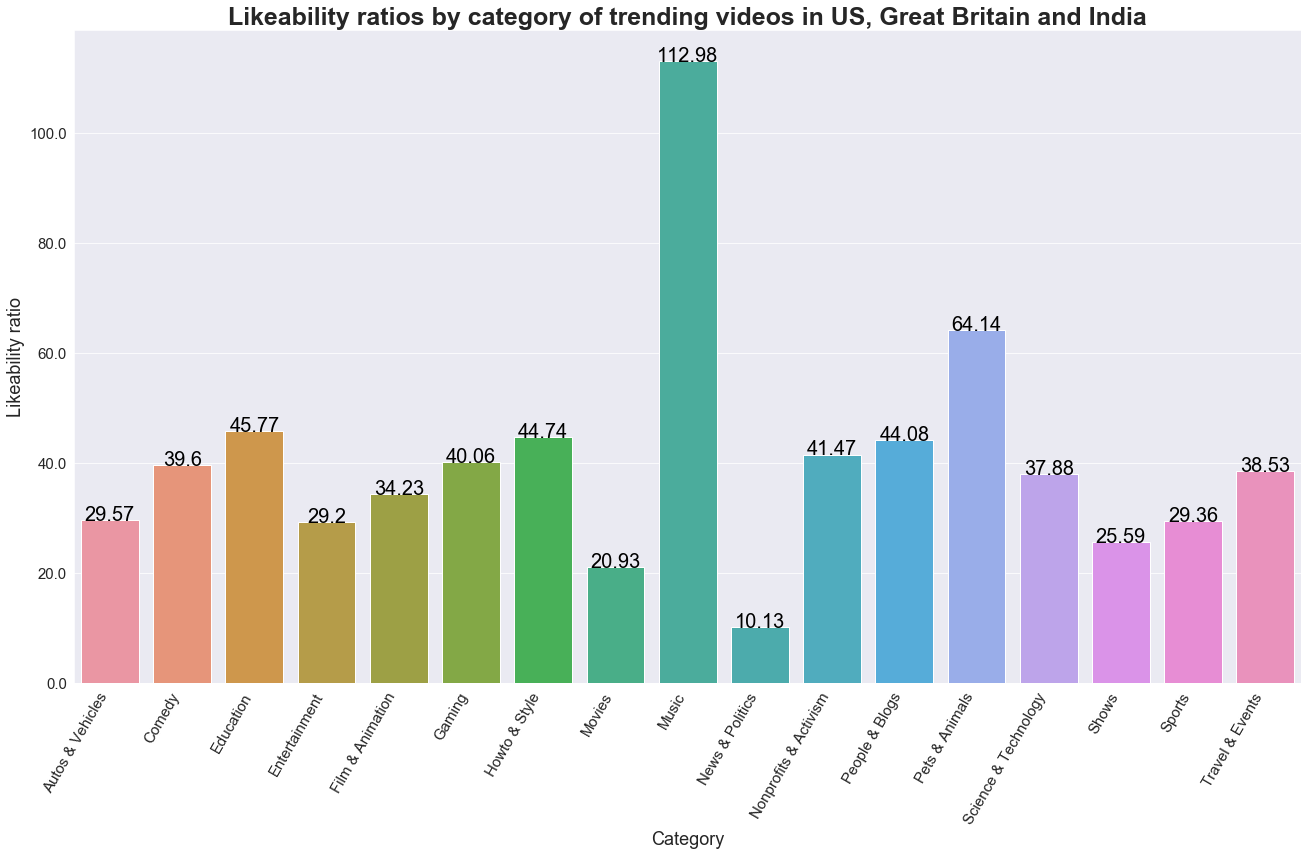

In [41]:
#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(22,12))
sns.set_style("darkgrid")
ax = sns.barplot(x="category",y="likeability_ratio", data=df_cat_mean)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Likeability ratio',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15, rotation = 60, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Likeability ratios by category of trending videos in US, Great Britain and India',size=25, weight='bold')
for index, row in df_cat_mean.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 20)
plt.show()

##### United States

As we can see in the bar plot below, the top categories in terms of likeability ratio in the US were "Pets & Animals" (with over 62 likes per dislike), followed by "Music", "People & Blogs", "Howto & Style" and "Education". The lowest category was "News & Politics" (with just about 12 likes per dislike), which reflects the polarization and divisiveness of the population over politics in recent years.  

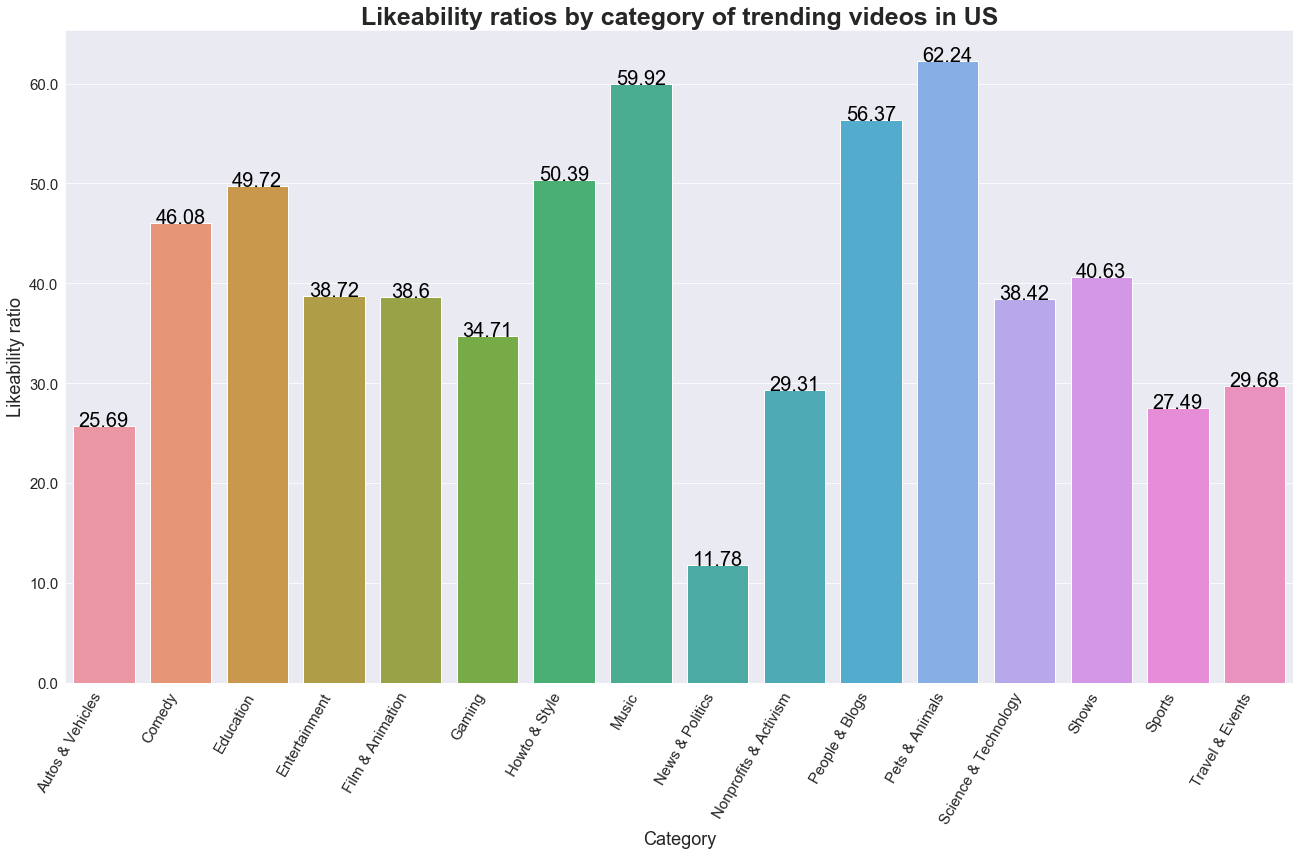

In [42]:
df_cat_mean=df[df['Country'] == 'US'].groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(22,12))
sns.set_style("darkgrid")
ax = sns.barplot(x="category",y="likeability_ratio", data=df_cat_mean)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Likeability ratio',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15, rotation = 60, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Likeability ratios by category of trending videos in US',size=25, weight='bold')
for index, row in df_cat_mean.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 20)
plt.show()

##### Great Britain

The bar plot below portrays the top categories in terms of likeability ratio in Great Britain. "Music" was the top ranked category (with over 158 likes per dislike), followed by "Shows" (over 131 likes per dislike), "Travel & Events", "Pets & Animals", and "Nonprofits & Activism". Similar to the US, "News & Politics" (with only 14 likes per dislike) ranked last. Interestingly, "Sports" was ranked second to last, which also makes sense because people have different rooting interests in terms of the teams they follow and teams they don't like. 

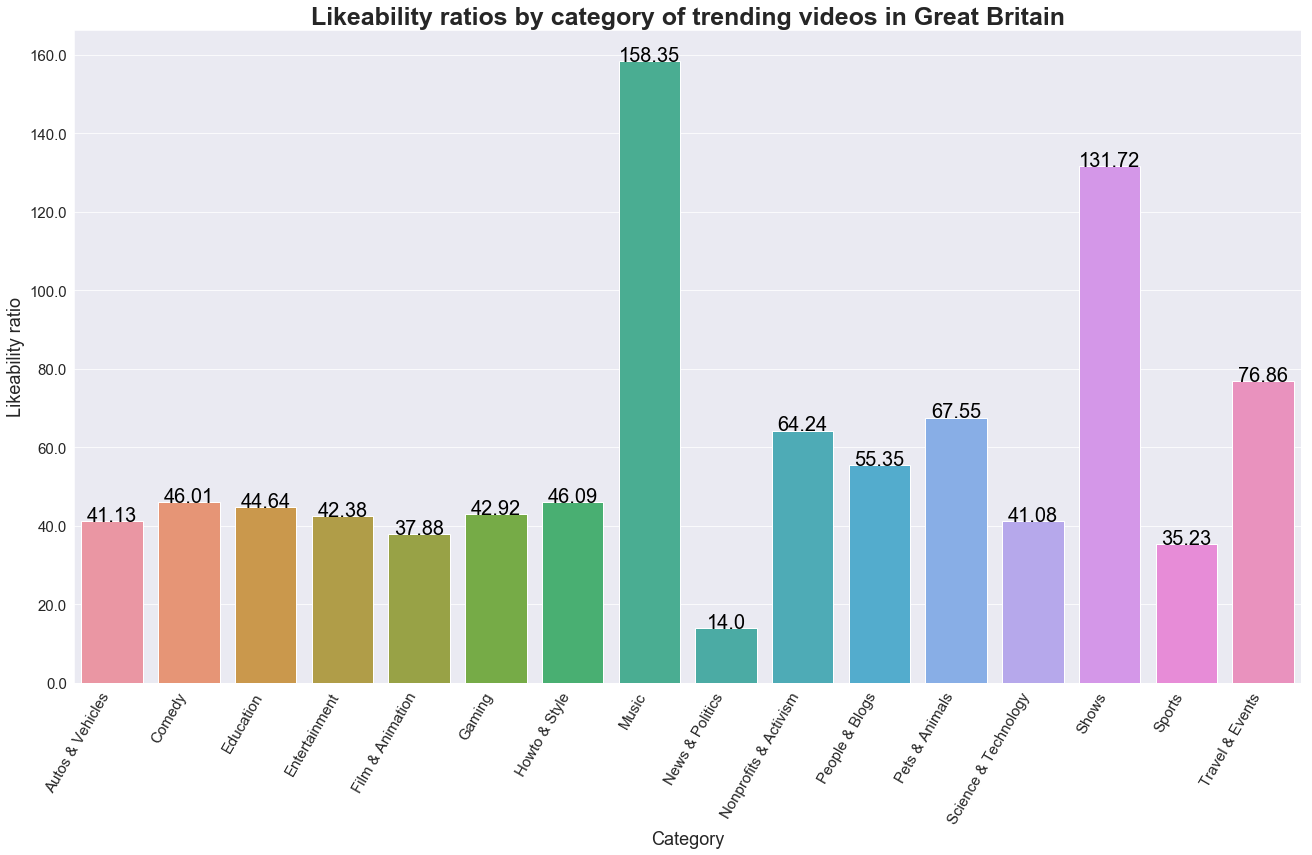

In [43]:
df_cat_mean=df[df['Country'] == 'GB'].groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(22,12))
sns.set_style("darkgrid")
ax = sns.barplot(x="category",y="likeability_ratio", data=df_cat_mean)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Likeability ratio',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15, rotation = 60, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Likeability ratios by category of trending videos in Great Britain',size=25, weight='bold')
for index, row in df_cat_mean.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 20)
plt.show()

##### India

For India, the distribution of likeability ratios by category were quite different from the US and Great Britain. The range was from a minimum of about 5 to slightly over 40, which is much lower than the top ratios for the other two countries. The top categories in terms of likeability ratio in India was "Pets & Animals" (with over 41 likes per dislike), followed by "Education" (over 40 likes per dislike), "Science & Technology", "Music", and "Comedy". Interestingly, "Shows" category was ranked last (with only about 5 likes per dislike). Similar to the other two countries, "News & Politics" (with only about 8 likes per dislike) ranked towards the bottom of the list in terms of likeability ratio. As we can see, the preferences of viewers in India were quite different from the US and Great Britain.    

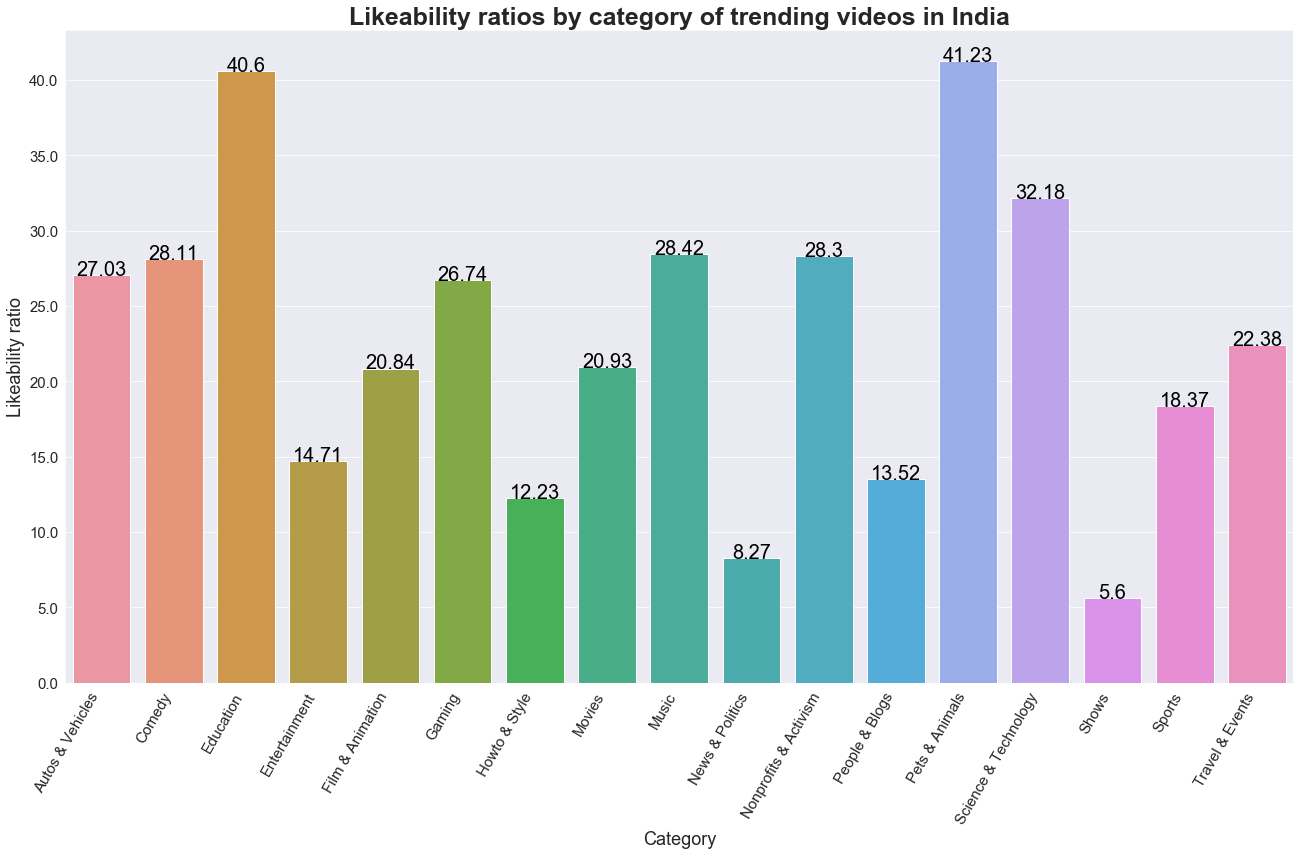

In [44]:
df_cat_mean=df[df['Country'] == 'IN'].groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(22,12))
sns.set_style("darkgrid")
ax = sns.barplot(x="category",y="likeability_ratio", data=df_cat_mean)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Likeability ratio',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15, rotation = 60, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Likeability ratios by category of trending videos in India',size=25, weight='bold')
for index, row in df_cat_mean.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 20)
plt.show()

### (ii) Number of videos by category

In the bar plot below, we see that the top categories in terms of the number of videos is "Entertainment" (with 33,763 videos over the given time period) and "Music" (23,459 videos). Both of these categories have significantly higher number of videos (more than rest of the categories combined). "People & Blogs", "News & Politics" and "Comedy" (all with over 8,000 videos) ranked third, fourth and fifth respectively.

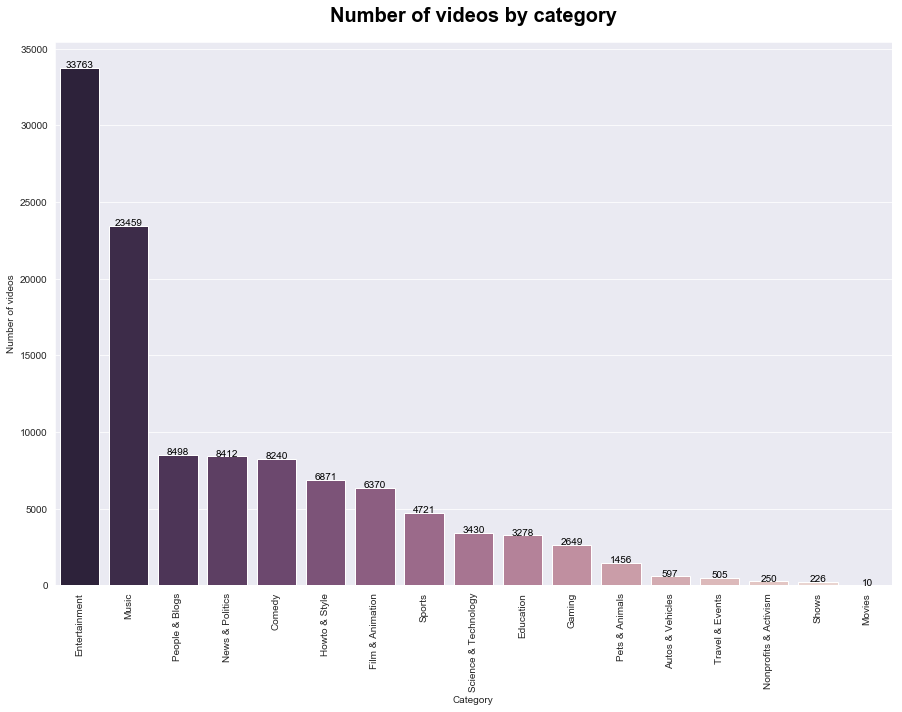

In [45]:
cdf = df["category"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category", "category": "No_of_videos"}, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
_ = sns.barplot(x="category", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Number of videos")
for index, row in cdf.iterrows():
    ax.text(row.name,row.No_of_videos, round(row.No_of_videos,2), color='black', ha="center", size = 10)
_=ax.set_title('Number of videos by category', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'black'}, pad=20)

### Performing text mining and NLP on title, tags and description columns

In [46]:
#load necessary libraries

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
from textblob import TextBlob

#defining a function to determine the sentiment type
def sentiment_predict(polarity):
    if polarity>0:
        return('Positive')
    elif polarity<0:
        return('Negative')
    else:
        return('Neutral')

### (iii) Analysis on YouTube Video Titles

In the analyses below, we tried to find the most popular words used in the titles of trending videos in each country and across all three countries using natural language processing (NLP). First, we created a bar plot of the top 15 frequently used words in titles of trending videos across all three countries, which included "official", "video", "trailer", "episode" and "full". The word cloud below also indicates that the titles of trending videos across all three countries includes "official video", "official trailer", "music video", and "official music". Based on this analysis, we can conclude that most of the trending videos are related to music, films, and related entertainment programs. However, it is important to create the same data visualizations for each country to get an idea of differences between the countries.

Sentiment analysis is a type of data mining that measures the inclination of people's opinions through natural language processing (NLP) and text analysis, which are used to determine whether the attitude towards a particular topic, product, or in our case, video, is positive, negative, or neutral. Across all three countries, we see that about 88.2% of trending video titles can be categorized as neutral or positive. This implies that having a neutral or positive video title could increase the chances of a video to become trending. 

In [47]:
# download and update needed nltk files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Austin
[nltk_data]     Hom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Austin
[nltk_data]     Hom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

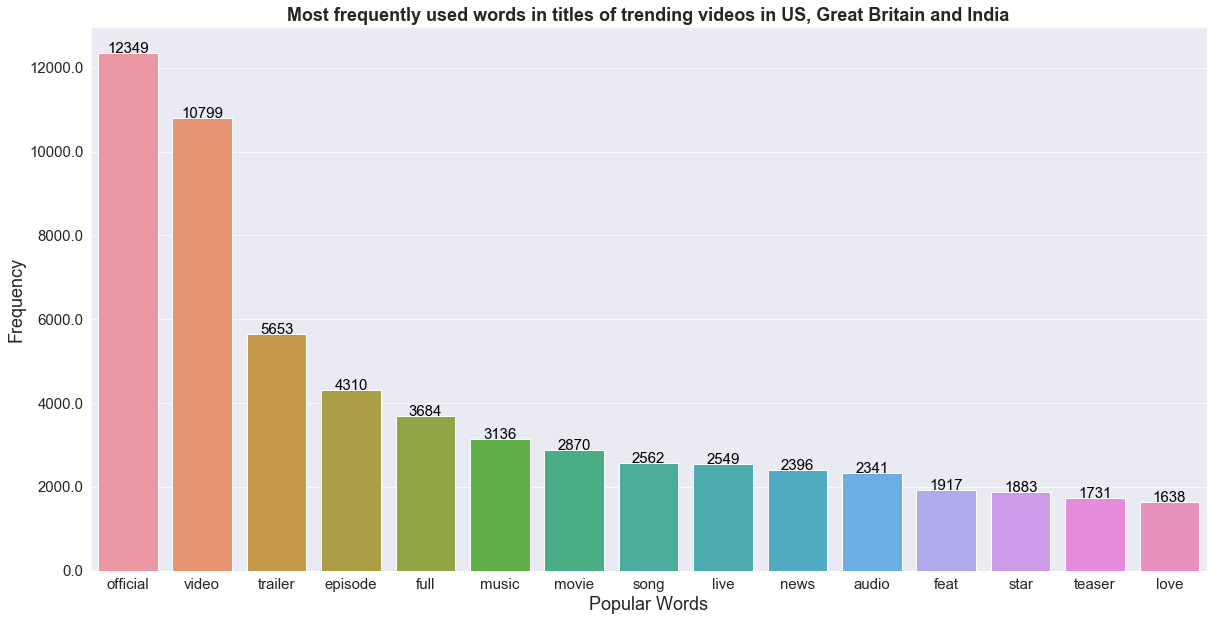

In [48]:
#converting title into lower case
lower_title_ALL=df['title'].str.lower()

#converting the series of titles into a single text
title_text_ALL = lower_title_ALL.str.cat(sep=' ')

#removing punctuation marks and numbers
title_text_ALL=re.sub('[^A-Za-z]+', ' ', title_text_ALL)

#getting stop words
stop_words = list(stopwords.words('english'))  
title_text_ALL=word_tokenize(title_text_ALL)
title_text_ALL=[w for w in title_text_ALL if w not in stop_words]

#removing words which have less than 4 characters
title_text_ALL=[w for w in title_text_ALL if len(w)>3]

# Calculate frequency distribution
dist_title_ALL=nltk.FreqDist(title_text_ALL)
result_title_ALL = pd.DataFrame(dist_title_ALL.most_common(100),columns=['Word', 'Frequency'])

#getting a visualization of the frequency of common words
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_title_ALL.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
for index, row in result_title_ALL.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most frequently used words in titles of trending videos in US, Great Britain and India',size=18, weight='bold')
plt.show()


In [49]:
#function to create word clouds
def word_cloud(data,title):
    plt.figure(figsize = (18,12))
    wc = WordCloud(background_color = 'white', max_words = 100, width=1600, height = 800)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.title(title, fontsize=25)
    plt.axis('off')

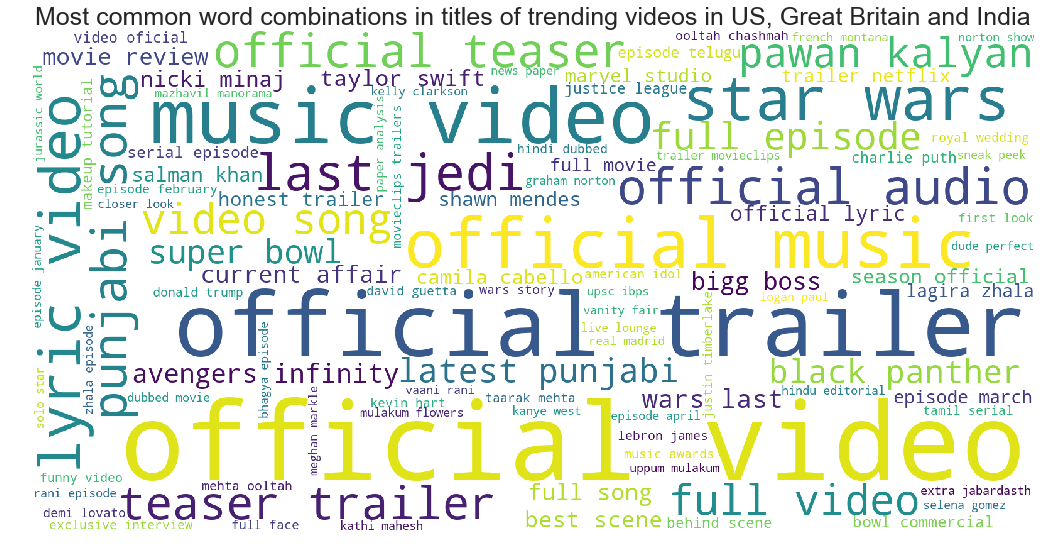

In [50]:
word_cloud(title_text_ALL,'Most common word combinations in titles of trending videos in US, Great Britain and India')

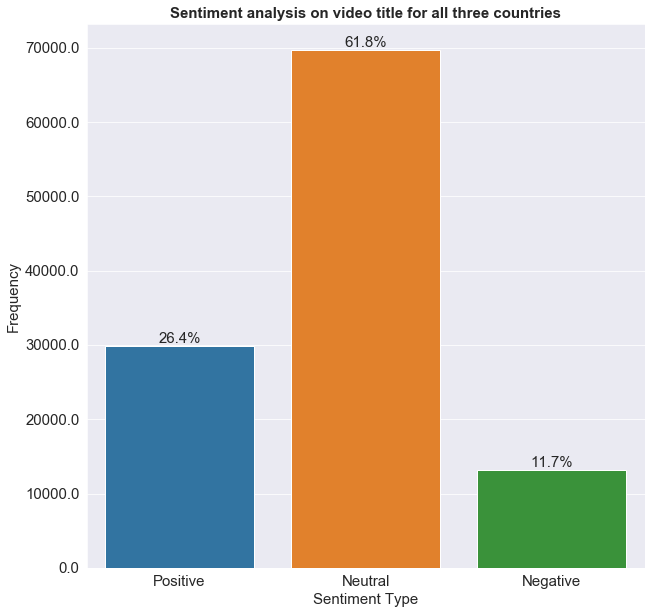

In [51]:
# GB videos: changing to string
df.title=df.title.astype('str')

#creating a list to store the sentence, it's polarity and it's subjectivity
title_sentiment_ALL=[]
#looping through the rows of the dataframe
for r in df.title:
    title_blob_ALL=TextBlob(r)
    title_sentiment_ALL.append((r,title_blob_ALL.polarity,title_blob_ALL.subjectivity))

#creating a dataframe of sentence, polarity and subjectivity
title_sentiment_ALL=pd.DataFrame(title_sentiment_ALL,columns=['Sentence','Polarity','Subjectivity'])

#applying the function to the polarity of the dataframe created above
title_sentiment_ALL['Sentiment']=title_sentiment_ALL['Polarity'].apply(sentiment_predict)

#Visualizing the number of sentiment types
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=title_sentiment_ALL, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(title_sentiment_ALL)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on video title for all three countries',size=15, weight='bold')
plt.show()

##### United States

The bar plot below shows the top 15 frequently used words in title of trending videos in the US. The most popular words used in the titles of trending videos were "official", followed by "video", "trailer", "makeup", "audio" and "music". We can also clearly see in the word cloud visualization below, "official video", "official trailer", "official music", "music video", "lyric video" and "star wars" are the most popular word combinations occuring in titles of trending videos in the US. We also see that about 85.8% of trending video titles in the US can be categorized as neutral or positive.

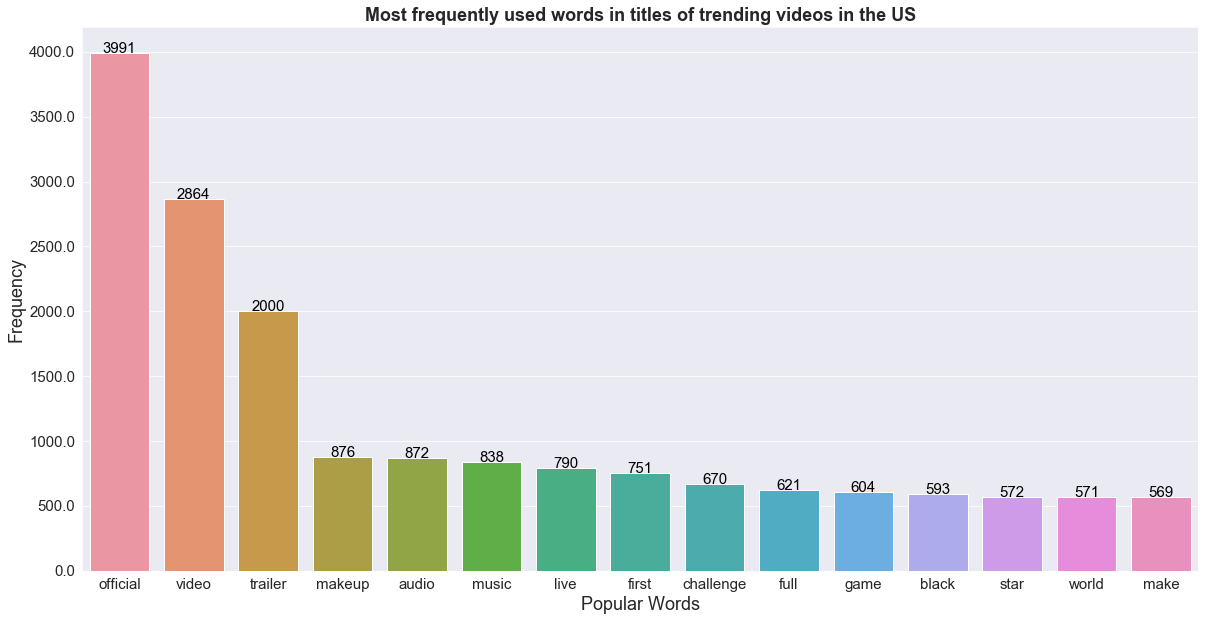

In [52]:
#converting title into lower case
lower_title_US=youtubeUS['title'].str.lower()

#converting the series of titles into a single text
title_text_US = lower_title_US.str.cat(sep=' ')

#removing punctuation marks and numbers
title_text_US=re.sub('[^A-Za-z]+', ' ', title_text_US)

#getting stop words
stop_words = list(stopwords.words('english'))  
title_text_US=word_tokenize(title_text_US)
title_text_US=[w for w in title_text_US if w not in stop_words]

#removing words which have less than 4 characters
title_text_US=[w for w in title_text_US if len(w)>3]

# Calculate frequency distribution
dist_title_US=nltk.FreqDist(title_text_US)
result_title_US = pd.DataFrame(dist_title_US.most_common(100),columns=['Word', 'Frequency'])

#getting a visualization of the frequency of common words
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_title_US.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
for index, row in result_title_US.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most frequently used words in titles of trending videos in the US',size=18, weight='bold')
plt.show()

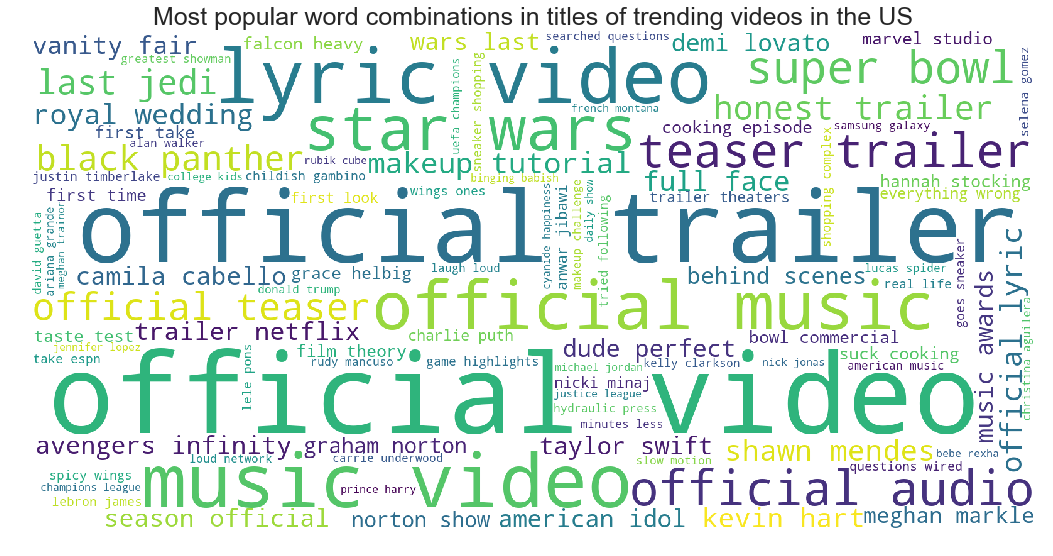

In [53]:
word_cloud(title_text_US,'Most popular word combinations in titles of trending videos in the US')

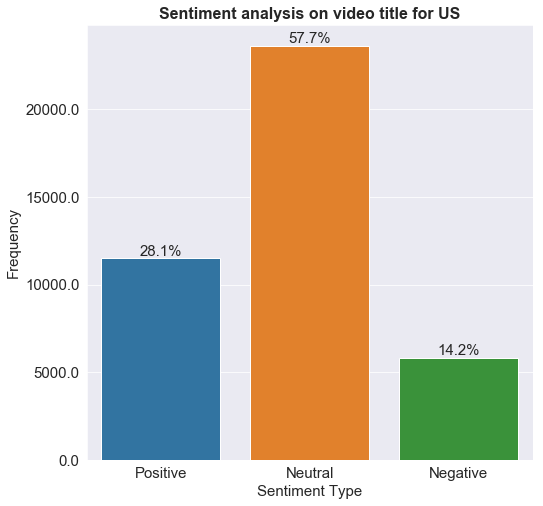

In [54]:
# US videos: changing to string
youtubeUS.title=youtubeUS.title.astype('str')

#creating a list to store the sentence, it's polarity and it's subjectivity
title_sentiment_US=[]
#looping through the rows of the dataframe
for r in youtubeUS.title:
    title_blob_US=TextBlob(r)
    title_sentiment_US.append((r,title_blob_US.polarity,title_blob_US.subjectivity))

#creating a dataframe of sentence, polarity and subjectivity
title_sentiment_US=pd.DataFrame(title_sentiment_US,columns=['Sentence','Polarity','Subjectivity'])
#applying the function to the polarity of the dataframe created above
title_sentiment_US['Sentiment']=title_sentiment_US['Polarity'].apply(sentiment_predict)

#Visualizing the number of sentiment types
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=title_sentiment_US, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(title_sentiment_US)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on video title for US',size=16, weight='bold')
plt.show()


##### Great Britain

The bar plot below shows the top 15 frequently used words in title of trending videos in Great Britain. Similar to the data from the US, the most popular words used in the titles of trending videos in Great Britain included "official", "video", "trailer", "music", and "video". The most popular word combinations occuring in titles of trending videos in Great Britain included "official video", "official trailer", "official music", "music video", "star wars" and "last jedi", indicating there is some similar characteristics between trending videos in the US and Great Britain. We also see that 87.3% of trending video titles in Great Britain can be categorized as neutral or positive. 

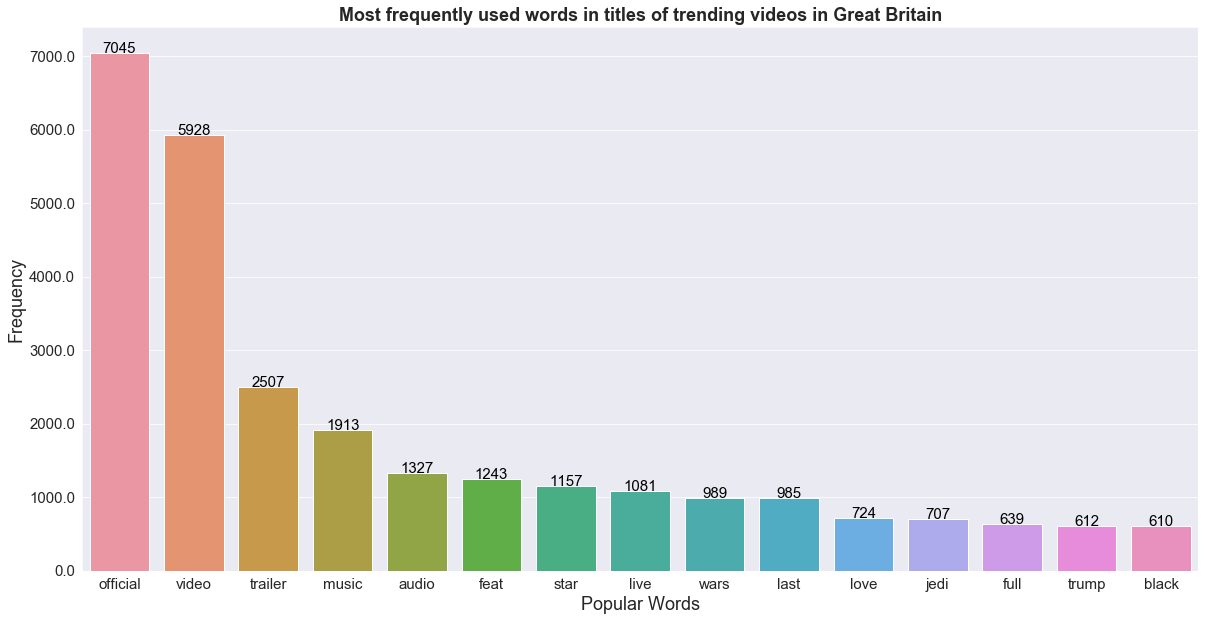

In [55]:
#converting title into lower case
lower_title_GB=youtubeGB['title'].str.lower()

#converting the series of titles into a single text
title_text_GB = lower_title_GB.str.cat(sep=' ')

#removing punctuation marks and numbers
title_text_GB=re.sub('[^A-Za-z]+', ' ', title_text_GB)

#getting stop words
stop_words = list(stopwords.words('english'))  
title_text_GB=word_tokenize(title_text_GB)
title_text_GB=[w for w in title_text_GB if w not in stop_words]

#removing words which have less than 4 characters
title_text_GB=[w for w in title_text_GB if len(w)>3]

# Calculate frequency distribution
dist_title_GB=nltk.FreqDist(title_text_GB)
result_title_GB = pd.DataFrame(dist_title_GB.most_common(100),columns=['Word', 'Frequency'])

#getting a visualization of the frequency of common words
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_title_GB.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
for index, row in result_title_GB.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most frequently used words in titles of trending videos in Great Britain',size=18, weight='bold')
plt.show()


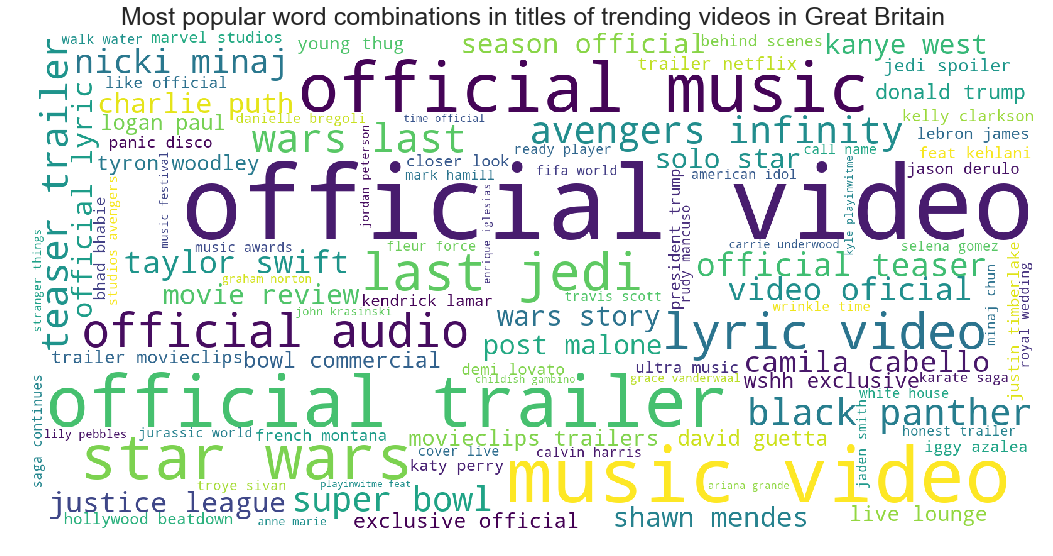

In [56]:
word_cloud(title_text_GB,'Most popular word combinations in titles of trending videos in Great Britain')

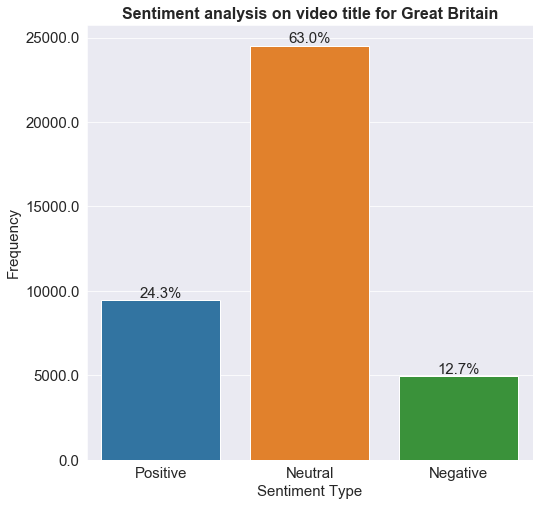

In [57]:
# GB videos: changing to string
youtubeGB.title=youtubeGB.title.astype('str')

#creating a list to store the sentence, it's polarity and it's subjectivity
title_sentiment_GB=[]
#looping through the rows of the dataframe
for r in youtubeGB.title:
    title_blob_GB=TextBlob(r)
    title_sentiment_GB.append((r,title_blob_GB.polarity,title_blob_GB.subjectivity))

#creating a dataframe of sentence, polarity and subjectivity
title_sentiment_GB=pd.DataFrame(title_sentiment_GB,columns=['Sentence','Polarity','Subjectivity'])

#applying the function to the polarity of the dataframe created above
title_sentiment_GB['Sentiment']=title_sentiment_GB['Polarity'].apply(sentiment_predict)

#Visualizing the number of sentiment types
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=title_sentiment_GB, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(title_sentiment_GB)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on video title for Great Britain',size=16, weight='bold')
plt.show()

##### India

The bar plot and the word cloud below shows the most frequently used words in titles of trending videos in India. The list here is a bit different from that of the US and Great Britain and includes "episode", "full", "video", "song", "movie" and "news". Interestingly, "telugu" is also one of the most frequently appearing words and it is the local language in certain parts of the country. In India, the most popular word combination was "punjabi song", followed by "video song", "official trailer" and "full episode". Finally, we see that about 92.6% of trending video titles in India can be categorized as neutral or positive, which is a bit higher than the percentages in the other two countries. This implies that, in India, videos with potentially negative titles will have a very difficult time to become trending and popular.

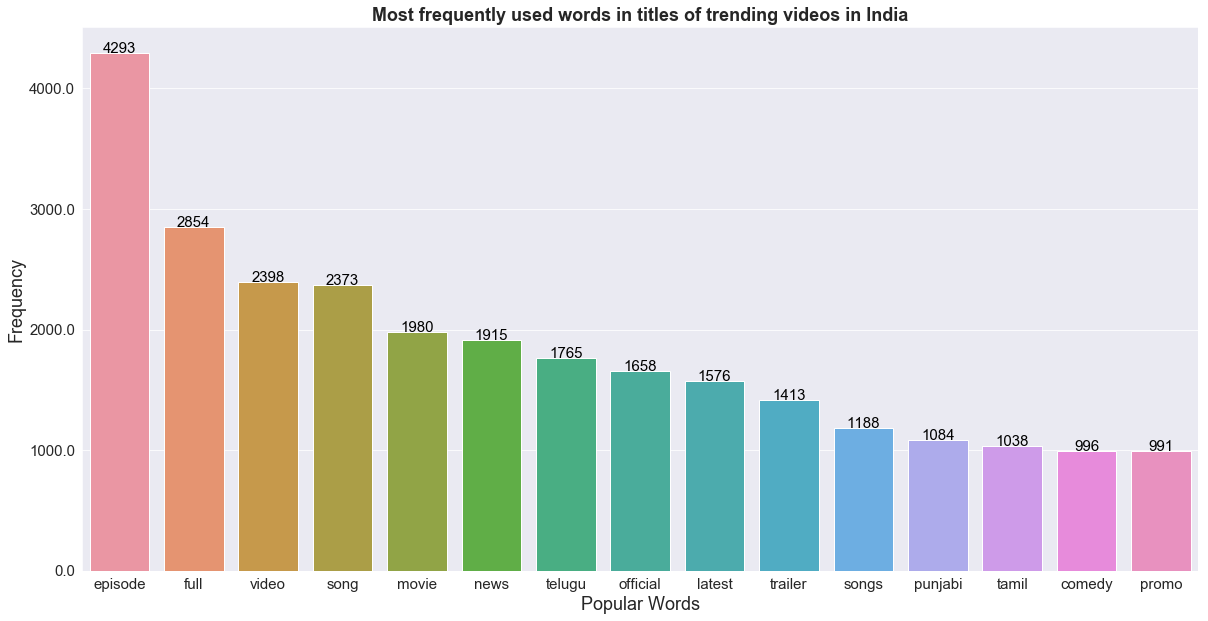

In [58]:
#converting title into lower case
lower_title_IN=youtubeIN['title'].str.lower()

#converting the series of titles into a single text
title_text_IN = lower_title_IN.str.cat(sep=' ')

#removing punctuation marks and numbers
title_text_IN=re.sub('[^A-Za-z]+', ' ', title_text_IN)

#getting stop words
stop_words = list(stopwords.words('english'))  
title_text_IN=word_tokenize(title_text_IN)
title_text_IN=[w for w in title_text_IN if w not in stop_words]

#removing words which have less than 4 characters
title_text_IN=[w for w in title_text_IN if len(w)>3]

# Calculate frequency distribution
dist_title_IN=nltk.FreqDist(title_text_IN)
result_title_IN = pd.DataFrame(dist_title_IN.most_common(100),columns=['Word', 'Frequency'])

#getting a visualization of the frequency of common words
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_title_IN.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
for index, row in result_title_IN.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most frequently used words in titles of trending videos in India',size=18, weight='bold')
plt.show()


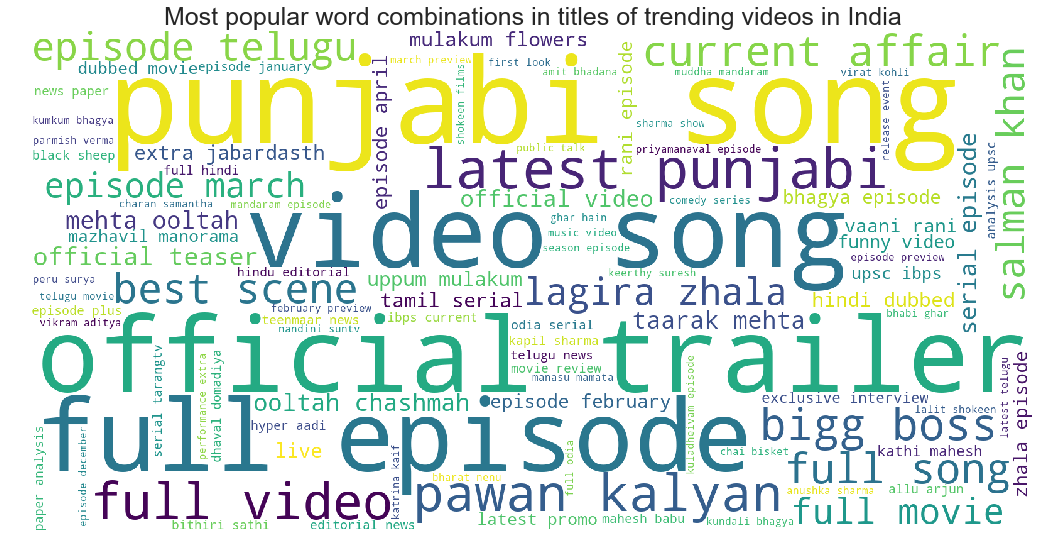

In [59]:
word_cloud(title_text_IN,'Most popular word combinations in titles of trending videos in India')

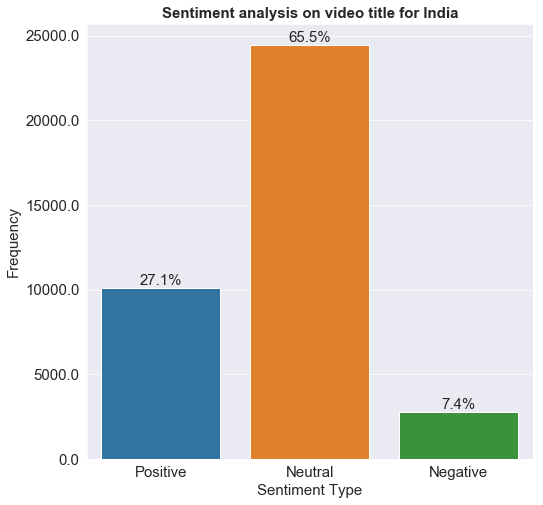

In [60]:
# IN videos: changing to string
youtubeIN.title=youtubeIN.title.astype('str')

#creating a list to store the sentence, it's polarity and it's subjectivity
title_sentiment_IN=[]
#looping through the rows of the dataframe
for r in youtubeIN.title:
    title_blob_IN=TextBlob(r)
    title_sentiment_IN.append((r,title_blob_IN.polarity,title_blob_IN.subjectivity))

#creating a dataframe of sentence, polarity and subjectivity
title_sentiment_IN=pd.DataFrame(title_sentiment_IN,columns=['Sentence','Polarity','Subjectivity'])

#applying the function to the polarity of the dataframe created above
title_sentiment_IN['Sentiment']=title_sentiment_IN['Polarity'].apply(sentiment_predict)

#Visualizing the number of sentiment types
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=title_sentiment_IN)
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(title_sentiment_IN)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on video title for India',size=15, weight='bold')
plt.show()

### (iv) Analysis on YouTube Video Tags

Tags are words and phrases that are included in your YouTube videos' description. They let viewers and YouTube know what videos are about and can help them rank higher in the platform's search results. One of the best ways to keyword-optimize videos for YouTube is leveraging tags. Tags are important because they help YouTube grasp a certain video’s content and context. This way, YouTube can understand a given video’s topic and category, and associate it with similar content, which can expand the video’s reach. 

In the analyses below, we tried to (1) identify the most popular tags among the trending videos on YouTube across all three countries; (2) examine the most popular tags used in trending videos on YouTube in each country to get a better grasp of popular video content and viewer preferences; and, (3) explored sentiment analyses on tags.

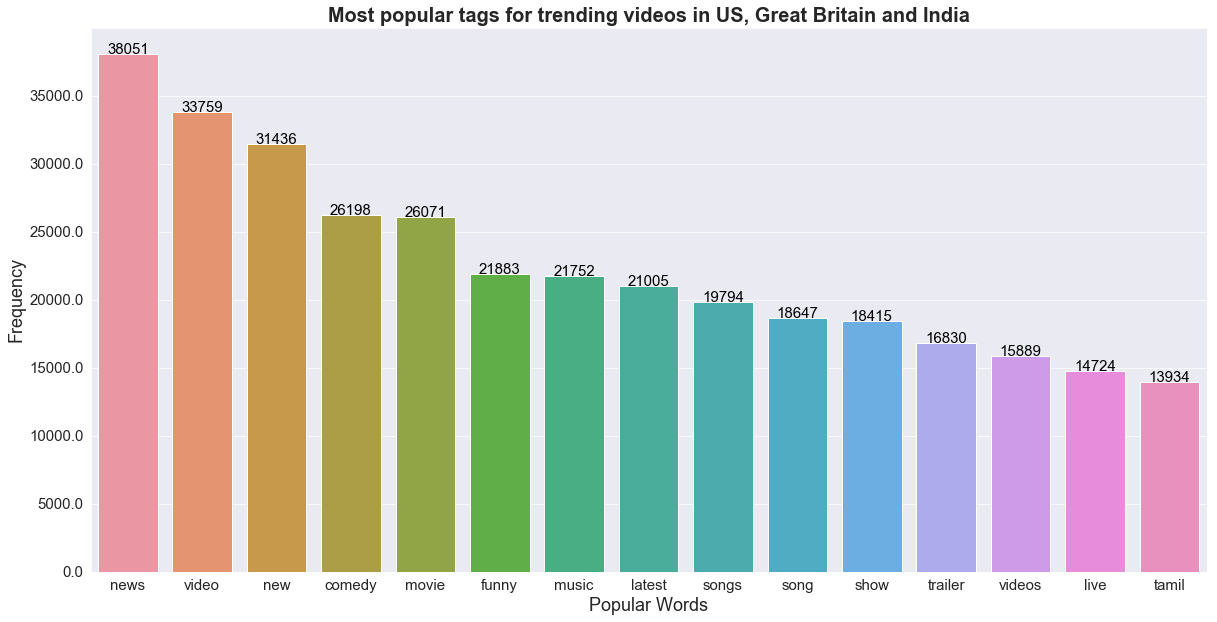

In [61]:
#converting tags into lower case
lower_tags_ALL=df['tags'].str.lower()

#converting the series of tagss into a single text
tags_text_ALL = lower_tags_ALL.str.cat(sep=' ')

#removing punctuation marks and numbers
tags_text_ALL=re.sub('[^A-Za-z]+', ' ', tags_text_ALL)
tags_text_ALL=word_tokenize(tags_text_ALL)
tags_text_ALL=[w for w in tags_text_ALL if w not in stop_words]

#removing words which have less than 3 characters
tags_text_ALL=[w for w in tags_text_ALL if len(w)>2]

# Calculate frequency distribution
dist_tags_ALL=nltk.FreqDist(tags_text_ALL)
result_tags_ALL = pd.DataFrame(dist_tags_ALL.most_common(100),columns=['Word', 'Frequency'])

#plot the distribution of common words in tags
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_tags_ALL.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
for index, row in result_tags_ALL.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most popular tags for trending videos in US, Great Britain and India',size=20, weight='bold')
plt.show()


As shown in both the bar plot above and the word cloud below, the most popular tags of trending videos in the US, Great Britain and India were "news" (over 40,000 videos), "video" (over 35,000 videos), "new" (slightly under 35,000 videos), "comedy" and "movie" (both just under 30,000 videos). Thus, including these and other popular tags shown in these visualizations in the video description increases the likelihood of the video to become trending and reach a wider audience acrpss all three countries. However, we still want to perform this analyses for each country to get an idea of any differences in the tags used, which could tell us more about viewer behavior and preferences and what types of content are more popular in each country. Sentiment analysis revealed that 84.2% of tags used in trending videos were positive or neutral.

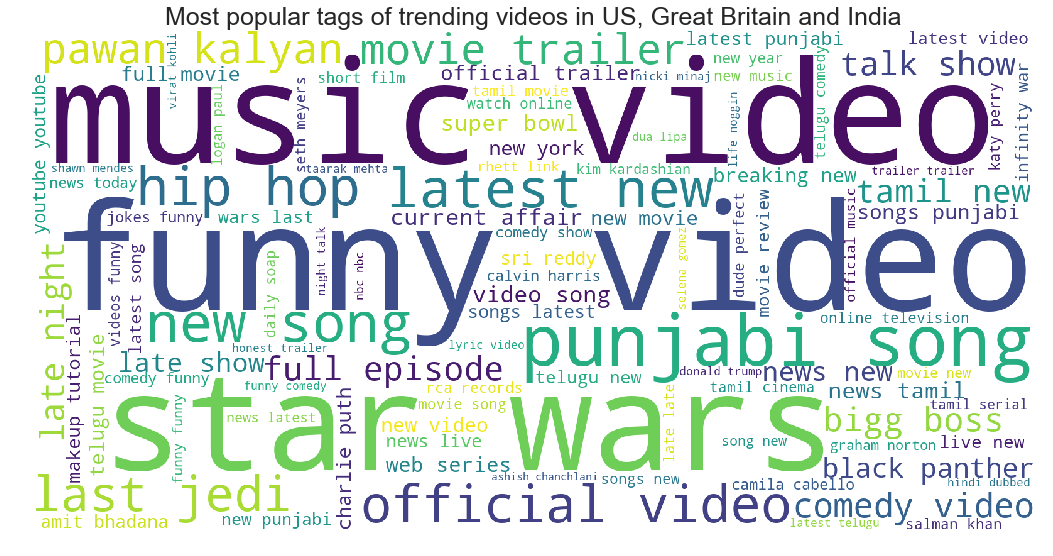

In [62]:
word_cloud(tags_text_ALL,'Most popular tags of trending videos in US, Great Britain and India')

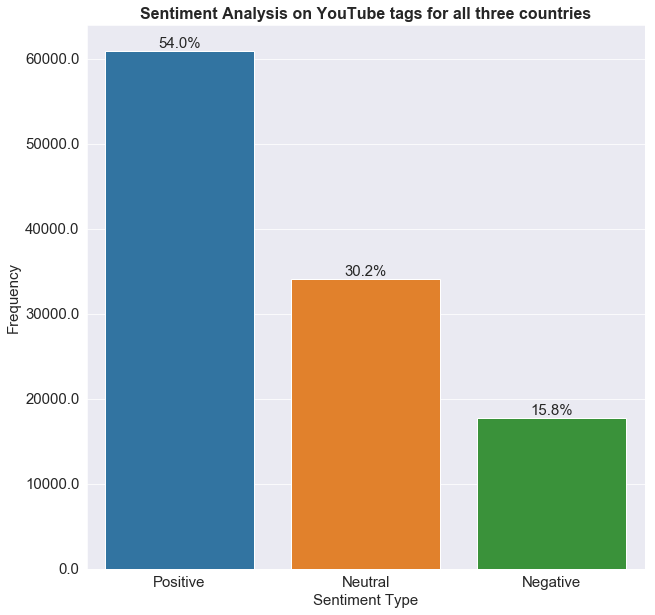

In [63]:
#All videos: change to strings
df.tags=df.tags.astype('str')

#function
tag_sentiment_ALL=[]
for r in df.tags:
    tag_blob_ALL=TextBlob(r)
    tag_sentiment_ALL.append((r,tag_blob_ALL.polarity,tag_blob_ALL.subjectivity))
    
tag_sentiment_ALL=pd.DataFrame(tag_sentiment_ALL,columns=['Sentence','Polarity','Subjectivity'])

#apply function
tag_sentiment_ALL['Sentiment']=tag_sentiment_ALL['Polarity'].apply(sentiment_predict)

#plot
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=tag_sentiment_ALL, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(tag_sentiment_ALL)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment Analysis on YouTube tags for all three countries',size=16, weight='bold')
plt.show()

##### United States

As shown in both the bar plot and the word cloud below, the most popular tags of trending videos in the US were "video" (over 8,000 videos), "makeup", "funny", "new" and "music". Thus, including these and other popular tags shown in these visualizations in the video description increases the likelihood of the video to become trending and reach a wider audience in the US. It is interesting that "makeup" is the second most popular tag, indicating the increasing popularity of these types of videos among YouTube viewers in the US. Sentiment analysis showed that 80.6% of the tags used in trending videos in the US were positive or neutral (which is slightly lower than the overall average among the three countries).  

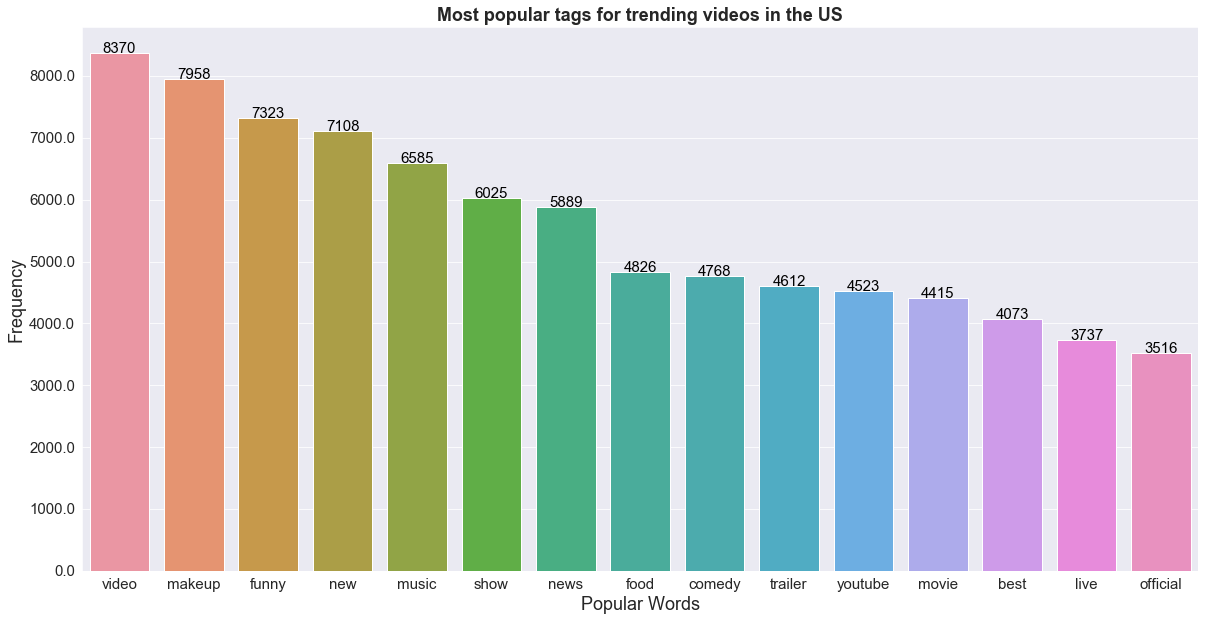

In [64]:
#converting tags into lower case
lower_tags_US=youtubeUS['tags'].str.lower()

#converting the series of tagss into a single text
tags_text_US = lower_tags_US.str.cat(sep=' ')

#removing punctuation marks and numbers
tags_text_US=re.sub('[^A-Za-z]+', ' ', tags_text_US)
tags_text_US=word_tokenize(tags_text_US)
tags_text_US=[w for w in tags_text_US if w not in stop_words]

#removing words which have less than 3 characters
tags_text_US=[w for w in tags_text_US if len(w)>2]

# Calculate frequency distribution
dist_tags_US=nltk.FreqDist(tags_text_US)
result_tags_US = pd.DataFrame(dist_tags_US.most_common(100),columns=['Word', 'Frequency'])

#plot the distribution of common words in tags
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_tags_US.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
for index, row in result_tags_US.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most popular tags for trending videos in the US',size=18, weight='bold')
plt.show()

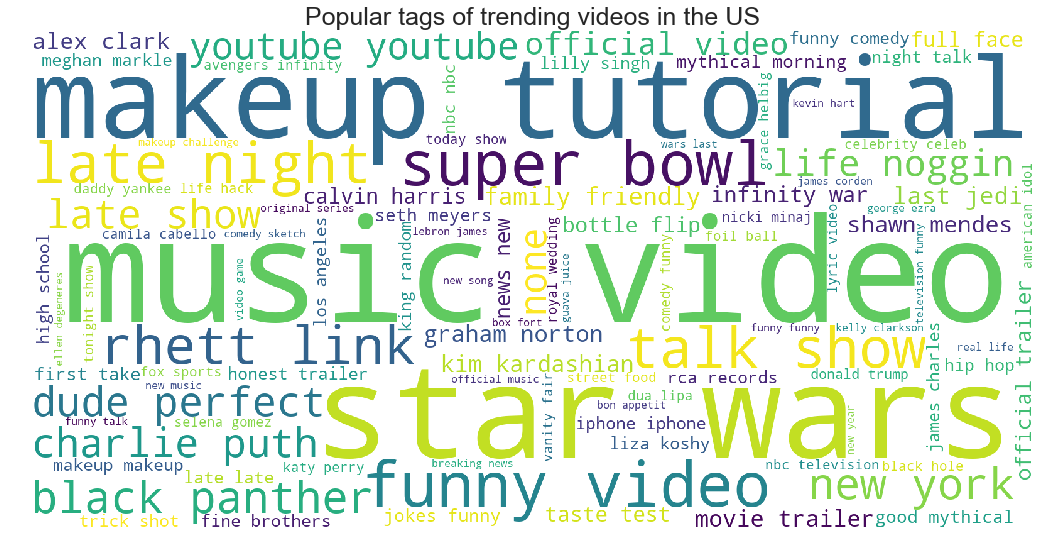

In [65]:
word_cloud(tags_text_US,'Popular tags of trending videos in the US')

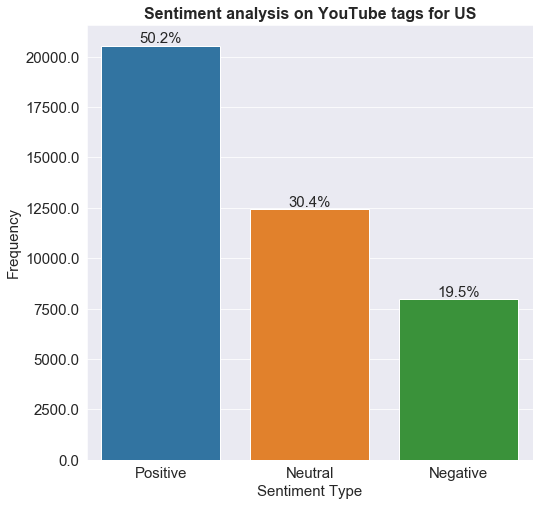

In [66]:
#US videos: change to strings
youtubeUS.tags=youtubeUS.tags.astype('str')

#function
tag_sentiment_US=[]
for r in youtubeUS.tags:
    tag_blob_US=TextBlob(r)
    tag_sentiment_US.append((r,tag_blob_US.polarity,tag_blob_US.subjectivity))
    
tag_sentiment_US=pd.DataFrame(tag_sentiment_US,columns=['Sentence','Polarity','Subjectivity'])
#apply function
tag_sentiment_US['Sentiment']=tag_sentiment_US['Polarity'].apply(sentiment_predict)

#plot
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=tag_sentiment_US, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(tag_sentiment_US)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on YouTube tags for US',size=16, weight='bold')
plt.show()

##### Great Britain

As shown in both the bar plot and the word cloud below, the most popular tags of trending videos in Great Britain were "video" (over 12,000 videos), "music", "new", "official" and "trailer". So, including these and other popular tags shown in these visualizations in the video description increases the likelihood of the video to become trending and expand the video's reach in Great Britain. It is important to note that there is significant overlap between the tags of trending videos in the US and in Great Britain, indicating that there is similarities in the preferences of YouTube users in the two countries. Lastly, sentiment analysis showed that 80.9% of the tags used in trending videos in Great Britain were positive or neutral (which is slightly lower than the overall average of 84.2% in all three countries). 

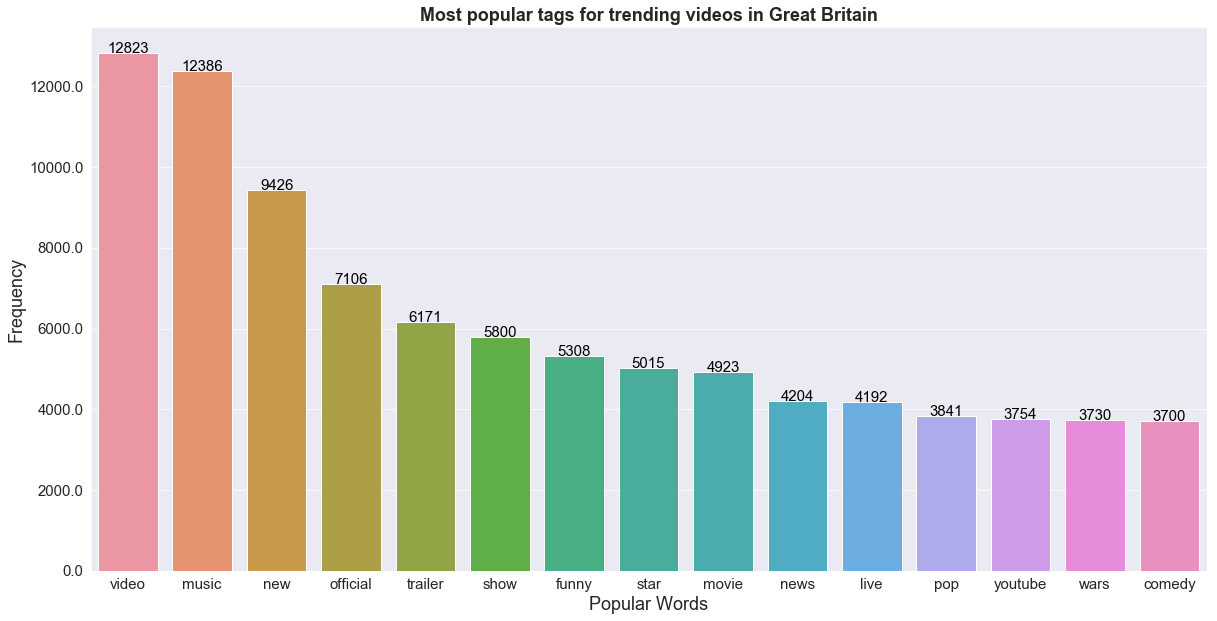

In [67]:
#converting tags into lower case
lower_tags_GB=youtubeGB['tags'].str.lower()

#converting the series of tagss into a single text
tags_text_GB = lower_tags_GB.str.cat(sep=' ')

#removing punctuation marks and numbers
tags_text_GB=re.sub('[^A-Za-z]+', ' ', tags_text_GB)
tags_text_GB=word_tokenize(tags_text_GB)
tags_text_GB=[w for w in tags_text_GB if w not in stop_words]

#removing words which have less than 3 characters
tags_text_GB=[w for w in tags_text_GB if len(w)>2]

# Calculate frequency distribution
dist_tags_GB=nltk.FreqDist(tags_text_GB)
result_tags_GB = pd.DataFrame(dist_tags_GB.most_common(100),columns=['Word', 'Frequency'])

#plot the distribution of common words in tags
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_tags_GB.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
for index, row in result_tags_GB.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most popular tags for trending videos in Great Britain',size=18, weight='bold')
plt.show()


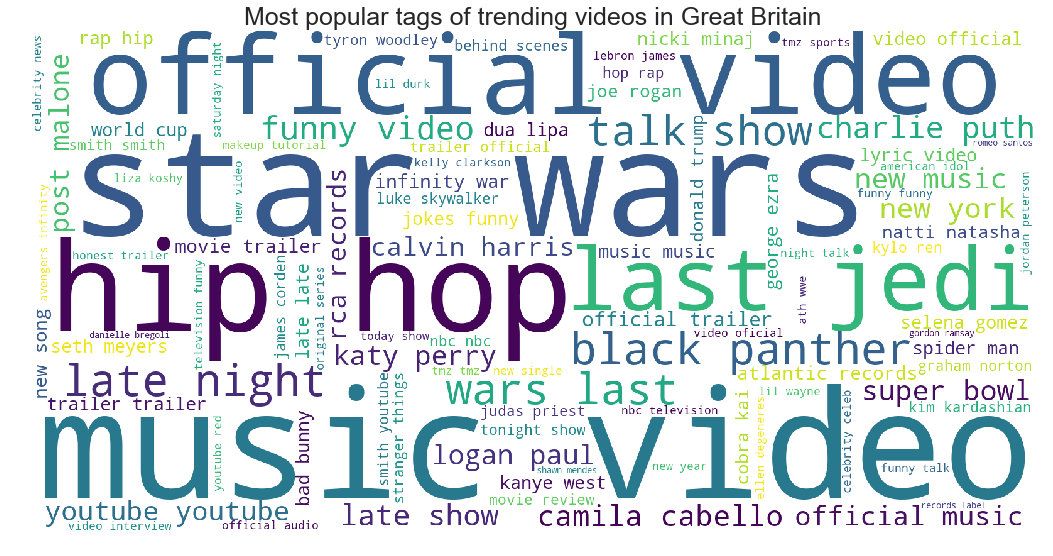

In [68]:
word_cloud(tags_text_GB,'Most popular tags of trending videos in Great Britain')

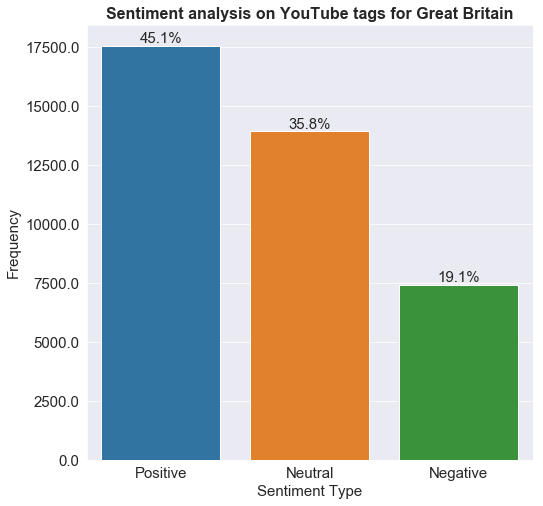

In [69]:
#GB videos: change to strings
youtubeGB.tags=youtubeGB.tags.astype('str')

#function
tag_sentiment_GB=[]
for r in youtubeGB.tags:
    tag_blob_GB=TextBlob(r)
    tag_sentiment_GB.append((r,tag_blob_GB.polarity,tag_blob_GB.subjectivity))
    
tag_sentiment_GB=pd.DataFrame(tag_sentiment_GB,columns=['Sentence','Polarity','Subjectivity'])

#apply function
tag_sentiment_GB['Sentiment']=tag_sentiment_GB['Polarity'].apply(sentiment_predict)

#plot
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=tag_sentiment_GB, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(tag_sentiment_GB)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on YouTube tags for Great Britain',size=16, weight='bold')
plt.show()

##### India

As shown in both the bar plot and word cloud below, the most popular tags of trending videos in India were "news" (over 30,000 videos), "latest", "songs", "comedy" and "movie". Thus, including these and other popular tags shown in these visualizations in the video description increases the likelihood of the video to become popular in India. It is important to note that there is significant difference among the tags of trending videos in India and to those in the US and Great Britain. The tags shown in these visualizations reflect that the viewer preferences are quite different in India, which means that advertisers should target audiences in each country differently. Lastly, sentiment analysis showed that 92.7% of the tags used in trending videos in India were positive or neutral (which is noticably higher than the overall average of 84.2% in all three countries).

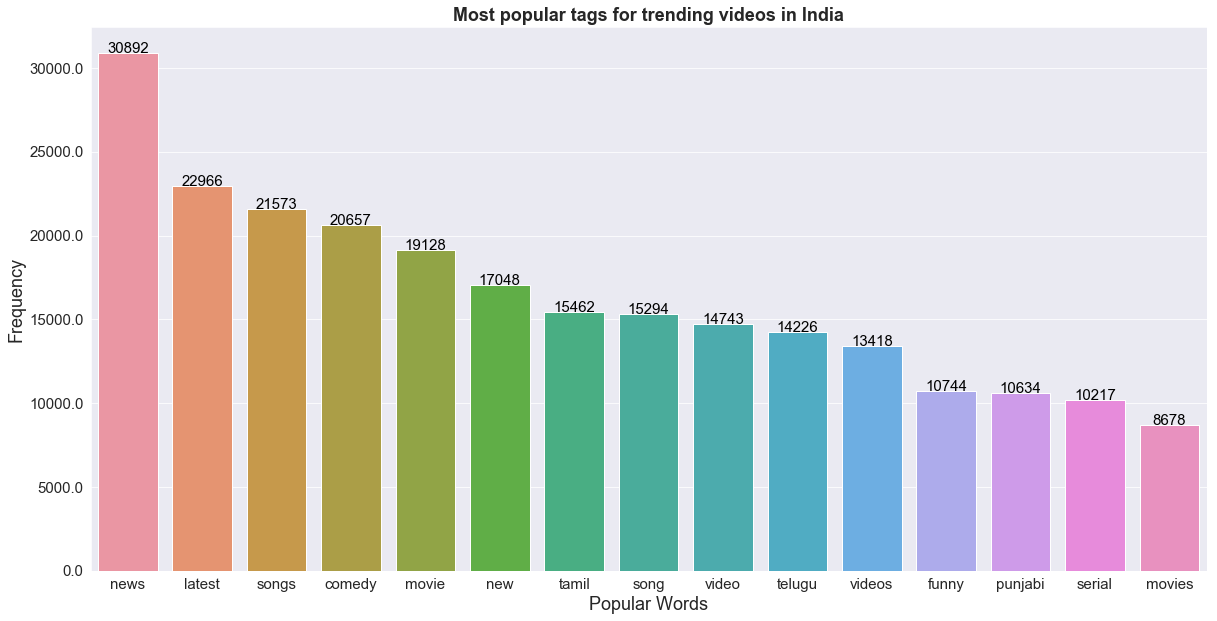

In [70]:
#converting tags into lower case
lower_tags_IN=youtubeIN['tags'].str.lower()

#converting the series of tagss into a single text
tags_text_IN = lower_tags_IN.str.cat(sep=' ')

#removing punctuation marks and numbers
tags_text_IN=re.sub('[^A-Za-z]+', ' ', tags_text_IN)
tags_text_IN=word_tokenize(tags_text_IN)
tags_text_IN=[w for w in tags_text_IN if w not in stop_words]

#removing words which have less than 3 characters
tags_text_IN=[w for w in tags_text_IN if len(w)>2]

# Calculate frequency distribution
dist_tags_IN=nltk.FreqDist(tags_text_IN)
result_tags_IN = pd.DataFrame(dist_tags_IN.most_common(100),columns=['Word', 'Frequency'])

#plot the distribution of common words in tags
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax = sns.barplot(x="Word",y="Frequency", data=result_tags_IN.head(15))
plt.xlabel('Popular Words',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15)
ax.set_yticklabels(ax.get_yticks(), size = 15)
for index, row in result_tags_IN.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most popular tags for trending videos in India',size=18, weight='bold')
plt.show()


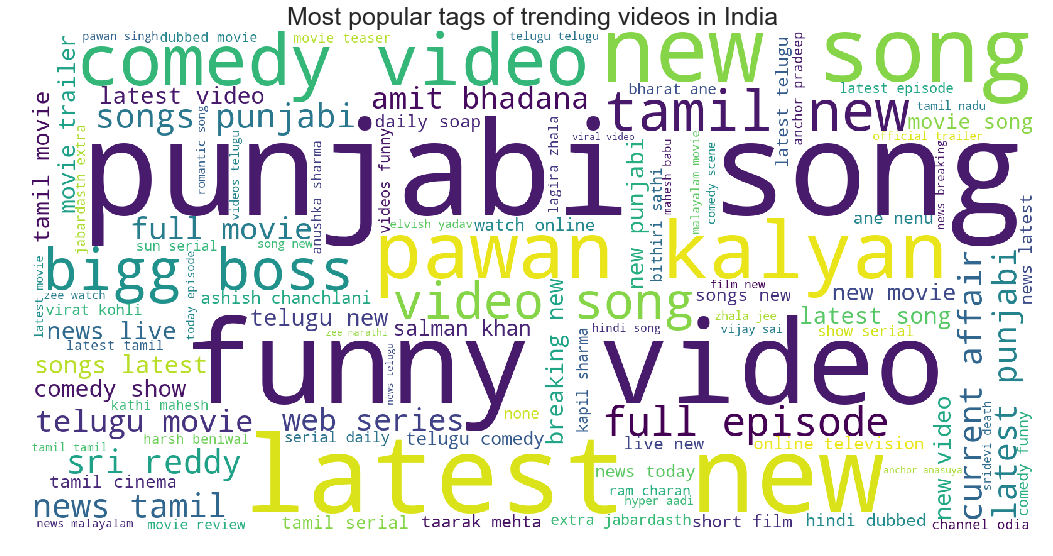

In [71]:
word_cloud(tags_text_IN,'Most popular tags of trending videos in India')

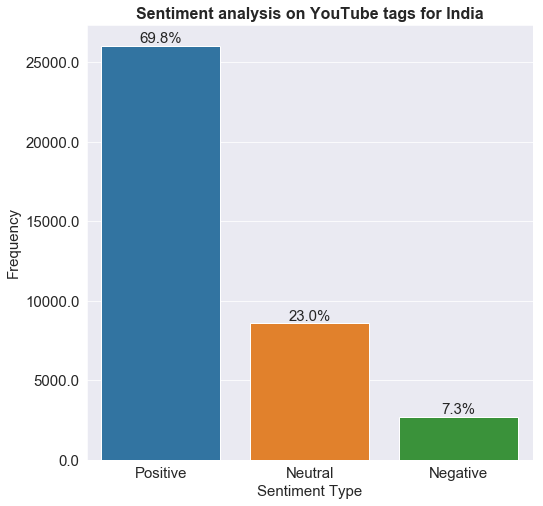

In [72]:
#IN videos: change to strings
youtubeIN.tags=youtubeIN.tags.astype('str')

#function
tag_sentiment_IN=[]
for r in youtubeIN.tags:
    tag_blob_IN=TextBlob(r)
    tag_sentiment_IN.append((r,tag_blob_IN.polarity,tag_blob_IN.subjectivity))
    
tag_sentiment_IN=pd.DataFrame(tag_sentiment_IN,columns=['Sentence','Polarity','Subjectivity'])

#apply function
tag_sentiment_IN['Sentiment']=tag_sentiment_IN['Polarity'].apply(sentiment_predict)

#plot
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=tag_sentiment_IN, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(tag_sentiment_IN)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on YouTube tags for India',size=16, weight='bold')
plt.show()

### (v) Analysis on descriptions of YouTube trending videos

The description of a videos also plays a role in whether the video becomes popular and trending. In the analyses below, first, we tried to find the most common words used in the descriptions of trending videos across all three countries. Then, we performed the analysis for each country to examine any differences between the countries. The most popular words included in the descriptions are "http", "https", "twitter", "youtube", "facebook" and "instagram" which means that most video creators include links to their websites, to the video or to their other social media accounts. It seems that the goal within descriptions is to increase the reach of the video across all social media platforms, gain more subscribers, and thus, maximize monetization. Across all three countries, sentiment analysis revealed that 91.4% of the descriptions provided in trending videos were positive or neutral. Looking at the same analyses for each country, we see similar results.

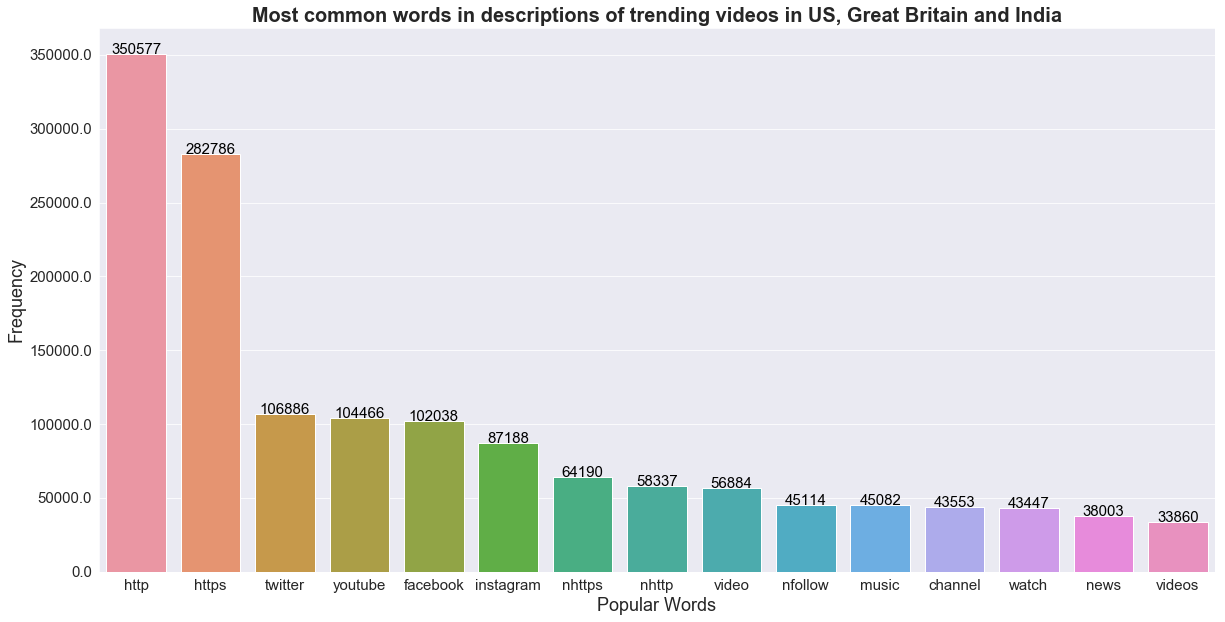

In [73]:
#descriptions for videos in all three countries
desc_text_ALL=df.description.str.lower()
desc_text_ALL=desc_text_ALL.str.cat(sep=' ')
desc_text_ALL=re.sub('[^a-zA-Z]+',' ',desc_text_ALL)
desc_text_ALL=word_tokenize(desc_text_ALL)
desc_text_ALL=[w for w in desc_text_ALL if w not in stop_words]
desc_text_ALL=[w for w in desc_text_ALL if len(w)>3]

#frequency distribution
desc_dist_ALL=nltk.FreqDist(desc_text_ALL)
result_desc_ALL=pd.DataFrame(desc_dist_ALL.most_common(100),columns=['Word','Frequency'])

#plot distribution
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
ax=sns.barplot(x='Word',y='Frequency',data=result_desc_ALL.head(15))
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Popular Words',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
for index, row in result_desc_ALL.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most common words in descriptions of trending videos in US, Great Britain and India',size=20, weight='bold')
plt.show()

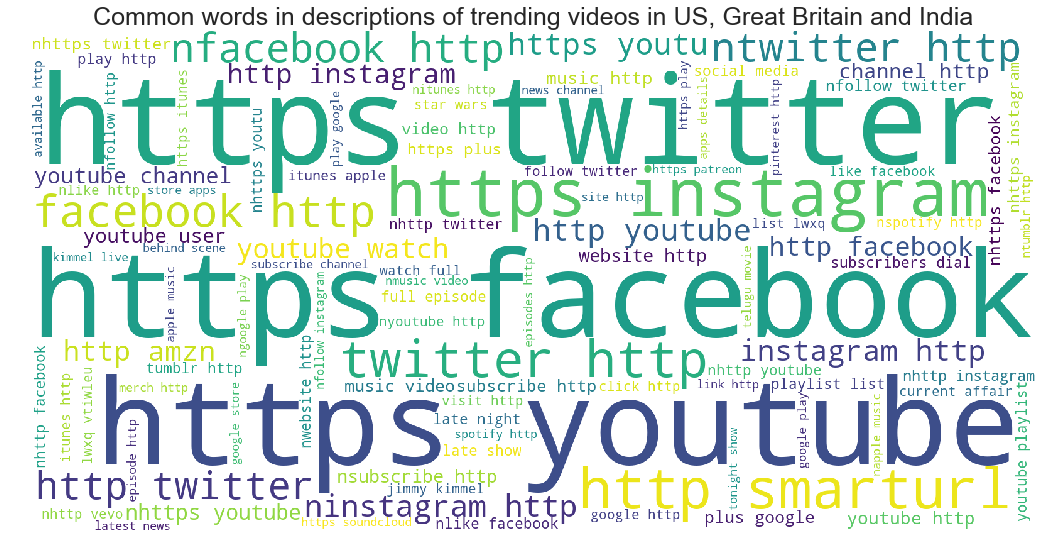

In [74]:
word_cloud(desc_text_ALL,'Common words in descriptions of trending videos in US, Great Britain and India')

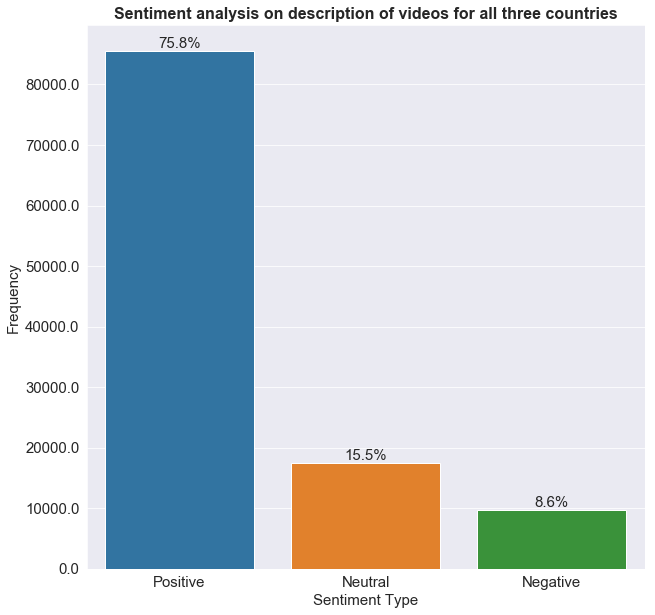

In [75]:
#All videos: change descriptions to str
df.description=df.description.astype('str')

#function
desc_sentiment_ALL=[]
for r in df.description:
    desc_blob_ALL=TextBlob(r)
    desc_sentiment_ALL.append((r,desc_blob_ALL.polarity,desc_blob_ALL.subjectivity))
    
desc_sentiment_ALL=pd.DataFrame(desc_sentiment_ALL,columns=['Sentence','Polarity','Subjectivity'])

#apply function
desc_sentiment_ALL['Sentiment']=desc_sentiment_ALL['Polarity'].apply(sentiment_predict)

#plot
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=desc_sentiment_ALL, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(desc_sentiment_ALL)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on description of videos for all three countries',size=16, weight='bold')
plt.show()

##### United States

The bar plot and word cloud below provide information about the most common words that appear in the descriptions of trending videos in the US. As we can see, the top words are "http", "https", "youtube", "twitter", "instagram" and "facebook", which indicates that most video creators include links to their websites, to the video or to their other social media accounts. Sentiment analysis shows that 90.7% of the descriptions provided in trending videos were positive or neutral.

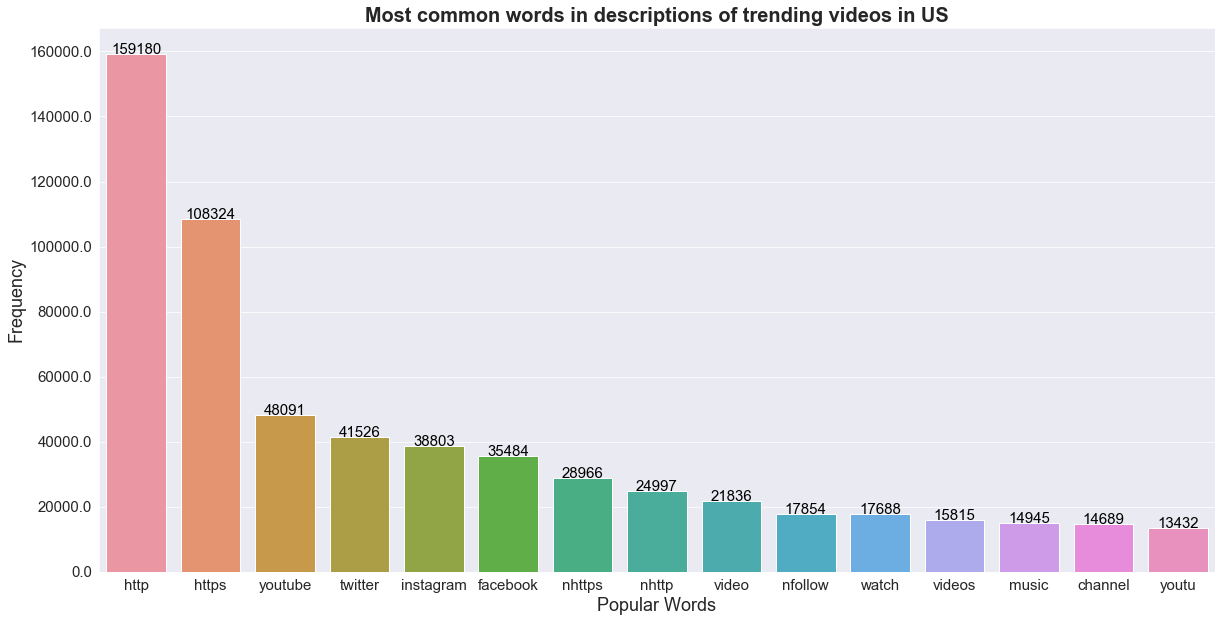

In [76]:
#descriptions for US videos
desc_text_US=youtubeUS.description.str.lower()
desc_text_US=desc_text_US.str.cat(sep=' ')
desc_text_US=re.sub('[^a-zA-Z]+',' ',desc_text_US)
desc_text_US=word_tokenize(desc_text_US)
desc_text_US=[w for w in desc_text_US if w not in stop_words]
desc_text_US=[w for w in desc_text_US if len(w)>3]

#calculate frequency of words
desc_dist_US=nltk.FreqDist(desc_text_US)
result_desc_US=pd.DataFrame(desc_dist_US.most_common(100),columns=['Word','Frequency'])

#plot distribution
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
ax=sns.barplot(x='Word',y='Frequency',data=result_desc_US.head(15))
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Popular Words',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
for index, row in result_desc_US.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most common words in descriptions of trending videos in US',size=20, weight='bold')
plt.show()

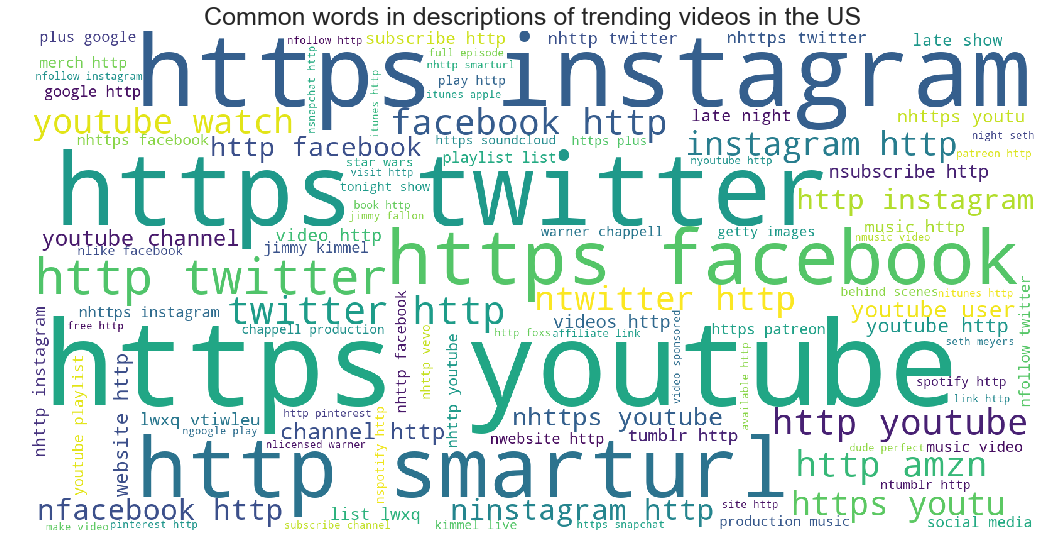

In [77]:
word_cloud(desc_text_US,'Common words in descriptions of trending videos in the US')

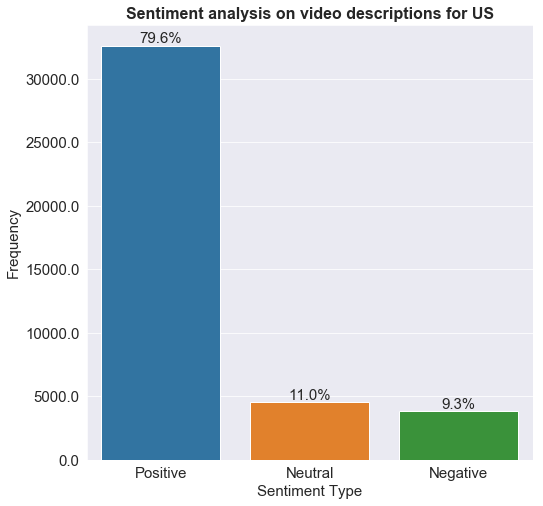

In [78]:
#US videos: change descriptions to str
youtubeUS.description=youtubeUS.description.astype('str')

#function
desc_sentiment_US=[]
for r in youtubeUS.description:
    desc_blob_US=TextBlob(r)
    desc_sentiment_US.append((r,desc_blob_US.polarity,desc_blob_US.subjectivity))
    
desc_sentiment_US=pd.DataFrame(desc_sentiment_US,columns=['Sentence','Polarity','Subjectivity'])

#apply function
desc_sentiment_US['Sentiment']=desc_sentiment_US['Polarity'].apply(sentiment_predict)

#plot
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=desc_sentiment_US, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(desc_sentiment_US)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on video descriptions for US',size=16, weight='bold')
plt.show()

##### Great Britain

The bar plot and word cloud below offers information about the most common words that appear in the descriptions of trending videos in Great Britain. As we can see, the top words are "http", "https", "twitter", "instagram", "facebook", and "youtube" which indicates that most video creators include links to their websites, to the video or to their other social media accounts. Sentiment analysis shows that 89.0% of the descriptions provided in trending videos were positive or neutral.

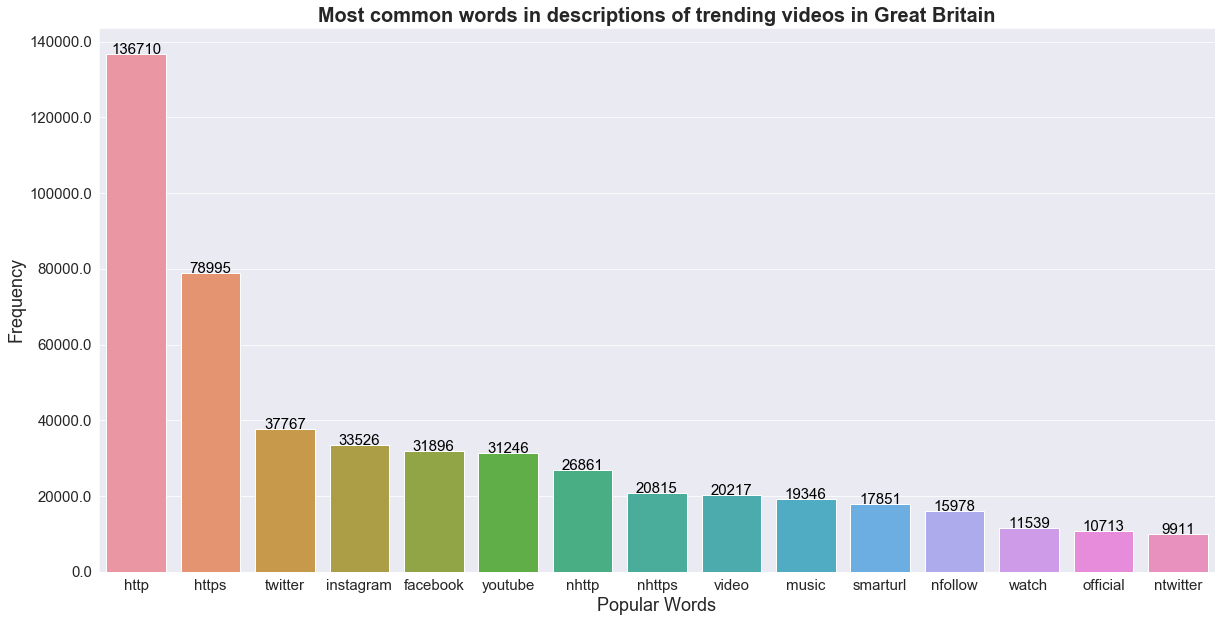

In [79]:
#descriptions for GB videos
desc_text_GB=youtubeGB.description.str.lower()
desc_text_GB=desc_text_GB.str.cat(sep=' ')
desc_text_GB=re.sub('[^a-zA-Z]+',' ',desc_text_GB)
desc_text_GB=word_tokenize(desc_text_GB)
desc_text_GB=[w for w in desc_text_GB if w not in stop_words]
desc_text_GB=[w for w in desc_text_GB if len(w)>3]

#calculate frequency of words
desc_dist_GB=nltk.FreqDist(desc_text_GB)
result_desc_GB=pd.DataFrame(desc_dist_GB.most_common(100),columns=['Word','Frequency'])

#plot distribution
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
ax=sns.barplot(x='Word',y='Frequency',data=result_desc_GB.head(15))
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Popular Words',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
for index, row in result_desc_GB.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most common words in descriptions of trending videos in Great Britain',size=20, weight = 'bold')
plt.show()


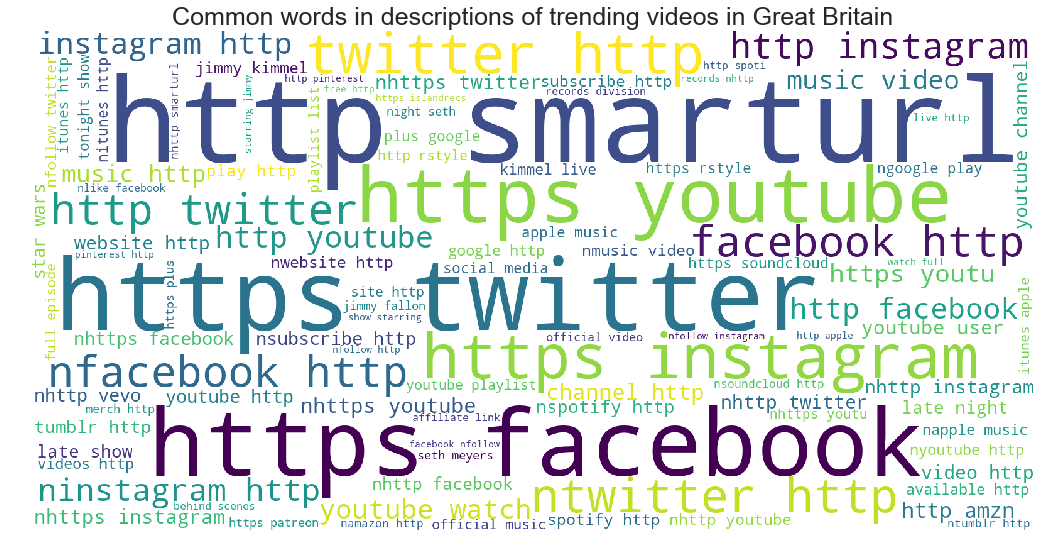

In [80]:
word_cloud(desc_text_GB,'Common words in descriptions of trending videos in Great Britain')

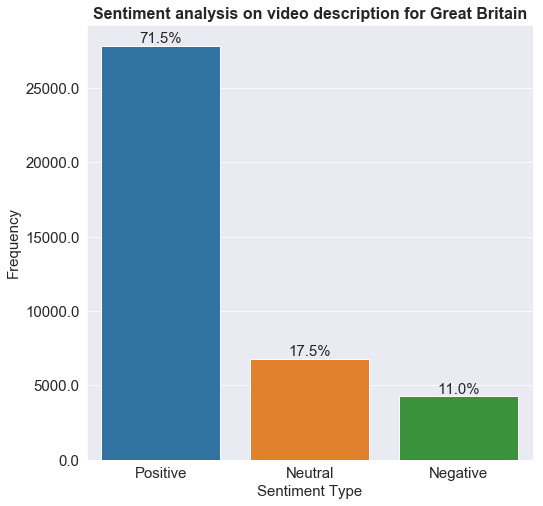

In [81]:
#GB videos: change descriptions to str
youtubeGB.description=youtubeGB.description.astype('str')

#function
desc_sentiment_GB=[]
for r in youtubeGB.description:
    desc_blob_GB=TextBlob(r)
    desc_sentiment_GB.append((r,desc_blob_GB.polarity,desc_blob_GB.subjectivity))
    
desc_sentiment_GB=pd.DataFrame(desc_sentiment_GB,columns=['Sentence','Polarity','Subjectivity'])

#apply function
desc_sentiment_GB['Sentiment']=desc_sentiment_GB['Polarity'].apply(sentiment_predict)

#plot
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=desc_sentiment_GB, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(desc_sentiment_GB)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment analysis on video description for Great Britain',size=16, weight='bold')
plt.show()

##### India

The bar plot and word cloud below gives us information about the most common words that appear in the descriptions of trending videos in India. As we can see, the top words are "https", "http", "facebook", "twitter", "youtube" and "news", which indicates that most video creators include links to their websites, to the video or to their other social media accounts. Sentiment analysis shows that 95.2% of the descriptions provided in trending videos were positive or neutral, which was higher than the figures for the US and Great Britain.

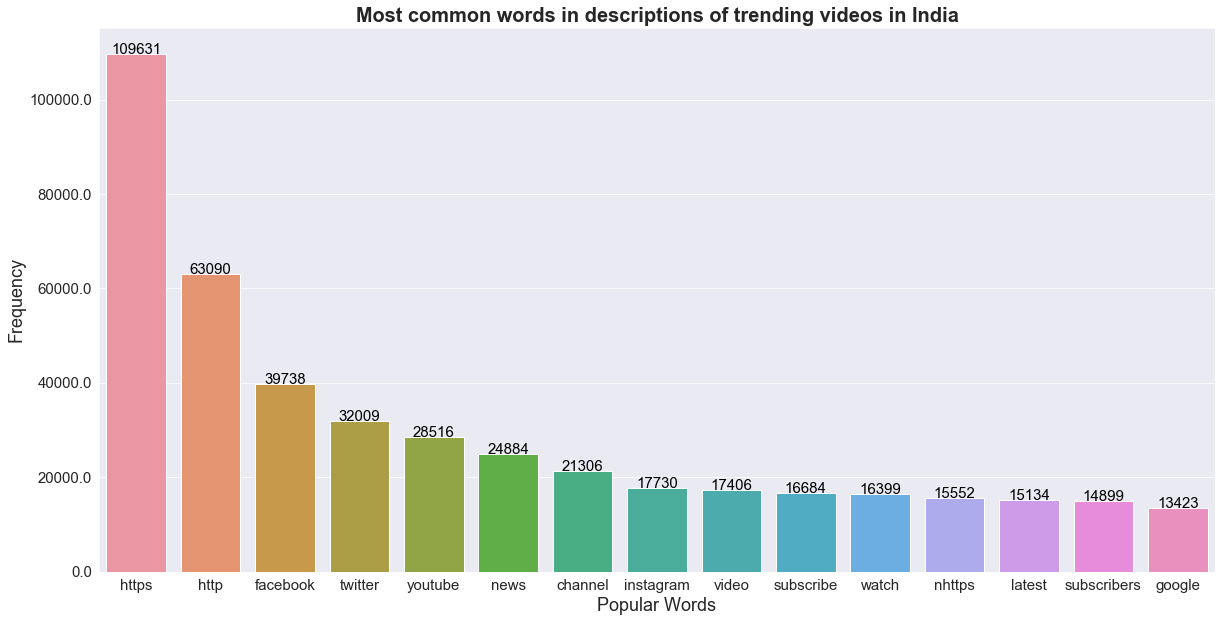

In [82]:
#descriptions for IN videos
desc_text_IN=youtubeIN.description.str.lower()
desc_text_IN=desc_text_IN.str.cat(sep=' ')
desc_text_IN=re.sub('[^a-zA-Z]+',' ',desc_text_IN)
desc_text_IN=word_tokenize(desc_text_IN)
desc_text_IN=[w for w in desc_text_IN if w not in stop_words]
desc_text_IN=[w for w in desc_text_IN if len(w)>3]

#calaculate frequency of words
desc_dist_IN=nltk.FreqDist(desc_text_IN)
result_desc_IN=pd.DataFrame(desc_dist_IN.most_common(100),columns=['Word','Frequency'])

#plot distribution
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
ax=sns.barplot(x='Word',y='Frequency',data=result_desc_IN.head(15))
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Popular Words',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
for index, row in result_desc_IN.head(15).iterrows():
    ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center", size = 15)
plt.title('Most common words in descriptions of trending videos in India',size=20, weight='bold')
plt.show()

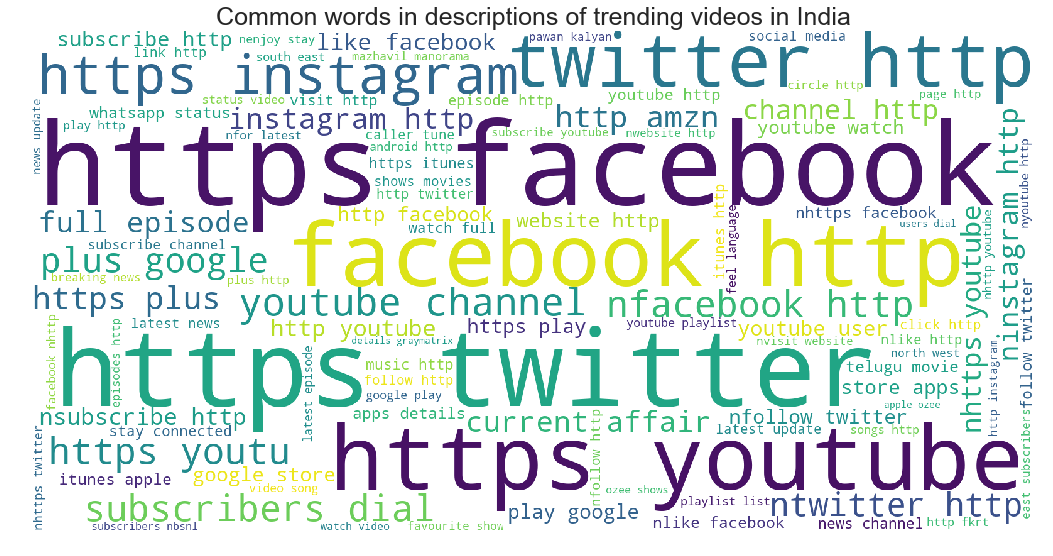

In [83]:
word_cloud(desc_text_IN,'Common words in descriptions of trending videos in India')

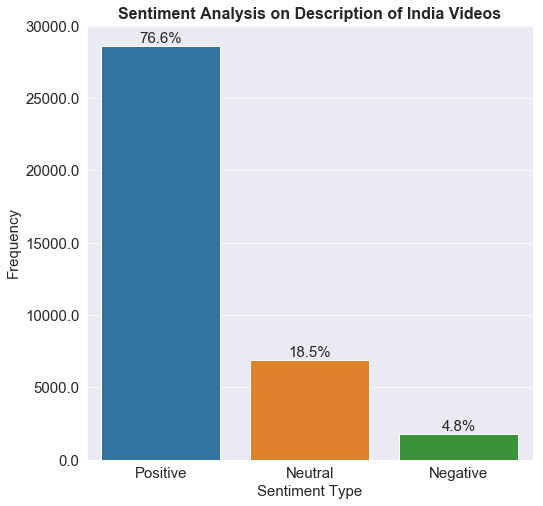

In [84]:
#IN videos: change descriptions to str
youtubeIN.description=youtubeIN.description.astype('str')

#function
desc_sentiment_IN=[]
for r in youtubeIN.description:
    desc_blob_IN=TextBlob(r)
    desc_sentiment_IN.append((r,desc_blob_IN.polarity,desc_blob_IN.subjectivity))
    
desc_sentiment_IN=pd.DataFrame(desc_sentiment_IN,columns=['Sentence','Polarity','Subjectivity'])

#apply function
desc_sentiment_IN['Sentiment']=desc_sentiment_IN['Polarity'].apply(sentiment_predict)

#plot
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax=sns.countplot(x='Sentiment',data=desc_sentiment_IN, order = ['Positive', 'Neutral', 'Negative'])
ax.set_yticklabels(ax.get_yticks(),fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15)
ax.set_xlabel('Sentiment Type',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ncount = len(desc_sentiment_IN)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size = 15) 
plt.title('Sentiment Analysis on Description of India Videos',size=16, weight='bold')
plt.show()

### (vi) Time Series Analysis on Total Views Per Day Per Region

In the chart below, we see the total view count of trending videos in each region over the same time period in 2017-2018. We see a similar trend between all countries until February 2018, when there is a significant spike in total views of trending videos in Great Britain. For USA, there is a steady spike in total views in April 2018. For India, the time series trend remains constant during the period of analysis. Overall, Great Britain had the highest average view count per day (with a maximum view count per day of over 2 billion), followed by the United States (a maximum view count per day of over 1 billion), and India, where the time series trend remained constant at under 0.5 billion views per day during the period of analysis. The view count represents the total number of views from across the world of all videos trending in the three countries separately. Thus, we can infer that videos that are trending in Great Britain tend to be watched by more people around the world, whereas the videos trending in the US tend to be watched by relatively less people than Great Britain, and the videos trending in India tend to have lower view counts from around the world.

The major spikes in the view counts around the world can be explained by major entertainment events (e.g., release of popular film trailers or music videos), sporting events (e.g., Super Bowl 2018), political events (e.g., meeting of President Trump and Kim Jong Un in March 2018) or cultural events (e.g., Royal Wedding in 2018). One interesting thing to note is the sharp spike downward in May 15th on 2018. In our research of what could be the possible explanation for this decrease, we found that in mid-May, Youtube began experimenting with changes to the Youtube algorithm (BBC, 2018). This may explain why there was such a sharp decrease in total views of trending videos on that day.

Overall, the reason for trending videos of India having less viewership count is because majority of the videos of India are made by individual content creators who create regional content which are not watched much outside of India, whereas the videos trending in US and Great Bratain are majorly music videos which are watched by people all across the world. Great Britain's trending videos has higher viewership count compared to the US on average because there is no human moderation on the videos released in Great Britain whereas there is some moderation done on the videos in the US depending on the number of cuss words used in the video. A good examle of this is Pewdiepie, who trends more in Great Britain than in the USA.

In [85]:
df_map2=df.copy()

In [86]:
#Sorting dates
df_map2=df_map2.sort_values('trending_date')

In [87]:
df_map2['Country']=df_map2['Country'].str.replace('GB','Great Britain').replace('IN','India')

In [88]:
#Reconstructing dataframe into appropriate format for visualization
df_map2=df_map2.groupby(['trending_date','Country'])['views'].sum().unstack()
df_map2 = df_map2.reset_index() 

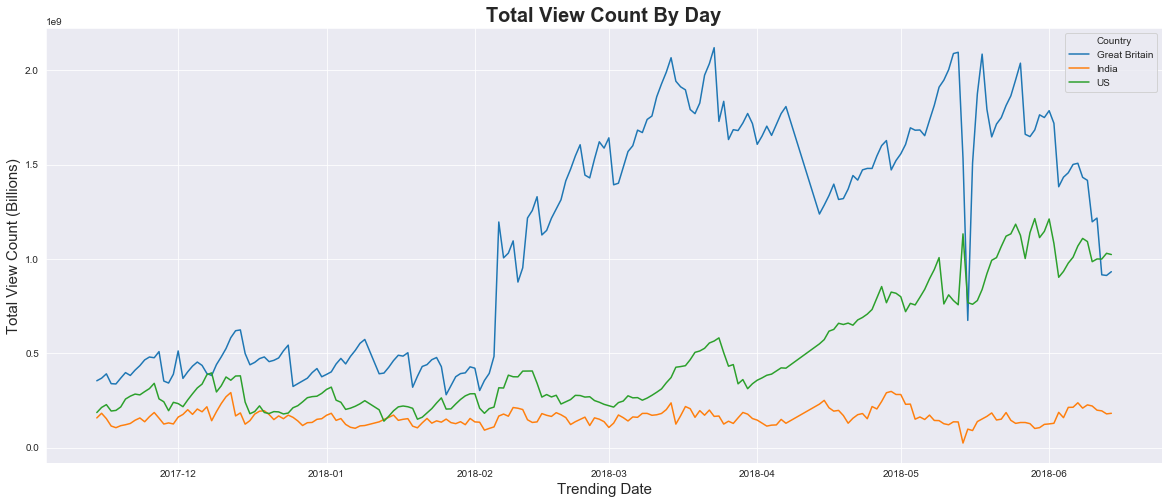

In [89]:
# Also make a line plot version of the gif
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'trending_date', y = 'value', hue = 'Country', data = pd.melt(df_map2, ['trending_date']))
ax.set_xlabel('Trending Date',fontsize=15)
ax.set_ylabel('Total View Count (Billions)',fontsize=15)
plt.title('Total View Count By Day',size=20, weight='bold')
plt.show()

## 4) Conclusions

Our findings reveal quite a bit of information about trending videos on YouTube in the United States, Great Britain and India, and they can serve as useful insights for video content creators, advertisers and viewers in these countries. Below is a summary of our findings:

- Although there were some slight differences across countries, videos in the "Music" and "Pets & Animals" categories had greater likeability ratios. Not surprisingly, “News and Politics” had the lowest likeability ratio across all three countries.

-  Among the trending videos in the dataset, a large majority of them fell into the "Entertainment" (33,763 videos) and "Music" (23,459 videos) categories.

- The most frequently used words in titles of trending videos across all three countries included "official", "video", "trailer", "episode" and "full". In terms of word combinations, "official video", "official trailer", "music video", and "official music" appeared the most, indicating most of the trending videos are related to music, film, and entertainment programs discussing music and film. The film, music and TV industry are major players on the YouTube platform. We also found  that the sentiments of about 88.2% of trending video titles can be categorized as neutral or positive.

- Across all three countries, the most popular tags used in the trending videos included "news", "video", "new", "comedy" and "movie". Interestingly, for the United States, "makeup" was the second most popular tag. Sentiment analysis on tags of the trending videos in our datset revealed that the sentiment of 84.2% of tags used in trending videos were positive or neutral.

- In each country, the most popular words included in the descriptions included "http", "https", "twitter", "youtube", "facebook", "instagram" and "channel", which means that most video creators include links to their websites, to the video or to their other social media accounts with the goal of increasing the reach of the video across all social media platforms, gaining more subscribers, and thus, maximizing monetization. Across all three countries, sentiment analysis revealed that 91.4% of the descriptions provided in trending videos were positive or neutral.

- Over the period of analysis, videos that are trending in Great Britain tend to be watched by more people around the world (with a maximum of 2 billion people per day), whereas the videos trending in the US tend to be watched by relatively less people (with a maximum of over 1 billion people), and the videos trending in India tend to have lower view counts around the world.

In conclusion, our project findings offer something of value for various interested parties, including creators, advertisers and viewers on the YouTube platform. Given that YouTube now has 2 billion monthly users who watch 250 million hours on TV screens daily (Variety, 2019) and the continuing trend of viewers moving away from tradition TV to online platforms like YouTube, it is an important time for advertisers and agencies to think about diversifying their advertising spending away from traditional TV to online platforms like YouTube. 


## Sources

1. Kaggle. 2019. "Trending YouTube Video Statistics: Daily statistics for trending YouTube videos". Accessed at https://www.kaggle.com/datasnaek/youtube-new.

2. Google. 2019. "How to make money on Youtube". Accessed at https://support.google.com/youtube/answer/72857?hl=en.

3. Google. 2020. "Monetization systems or ‘the ads algorithm’ explained". Accessed at https://support.google.com/youtube/answer/9269689?hl=en.

4. BBC. 2018. "'YouTube stars' fury over algorithm tests." Accessed at https://www.bbc.com/news/technology-44279189.

5. Julie Alexander. 2018. "No one knows how YouTube’s Trending section works". Polygon. Accessed at https://www.polygon.com/2018/2/21/17035758/how-does-youtube-trending-work-parkland

6. Todd Spangler. 2019. "YouTube Now Has 2 Billion Monthly Users, Who Watch 250 Million Hours on TV Screens Daily". Variety. https://variety.com/2019/digital/news/youtube-2-billion-users-tv-screen-watch-time-hours-1203204267/

7. What 40,000 Videos Tell Us About The Trending Tab https://www.youtube.com/watch?v=fDqBeXJ8Zx8